# Name: Harshil Maru

# Oasis Infobyte Internship TASK 4 LEVEL 2
Idea: Unveiling the Android App Market: Analyzing Google Play Store Data

Description:

Clean, categorize, and visualize Google Play Store data to understand app market dynamics.
Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills

## Key Concepts and Challenges:
1. **Data Preparation**: Clean and correct data types for accuracy.
2. **Category Exploration**: Investigate app distribution across categories.
3. **Metrics Analysis**: Examine app ratings, size, popularity, and pricing trends.
4. **Sentiment Analysis**: Assess user sentiments through reviews.
5. **Interactive Visualization**: Utilize code for compelling visualizations.
6. **Skill Enhancement**: Integrate insights from the "Understanding Data Visualization" course.

## Project Enhancements:
- Added time-based analysis to understand update trends.
- Included genre analysis for deeper insights.
- Added more interactive visualizations using Chart.js.
- Enhanced metrics analysis with new correlations and distributions.
- Improved sentiment analysis with additional visualizations.

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Load Dataset

**Note:** Since I don't have access to your local files, you'll need to adjust the file paths below to match your local environment. The dataset is available on Kaggle at the link provided in your original code: [Android App Market on Google Play](https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play). Download the dataset and update the paths accordingly.

Alternatively, you can uncomment the code below to download the dataset directly using `opendatasets` if you have your Kaggle API credentials set up.

In [2]:
# Uncomment the following lines if you want to download the dataset directly
# import opendatasets as od
# df_link = 'https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play'
# od.download(df_link)

# Load the datasets (update the file paths as needed)
df_app = pd.read_csv("android-app-market-on-google-play/datasets/apps.csv")
df_user_reviews = pd.read_csv("android-app-market-on-google-play/datasets/user_reviews.csv")

# Display the first few rows of each dataset
print("Apps Dataset Preview:")
display(df_app.head())
print("\nUser Reviews Dataset Preview:")
display(df_user_reviews.head())

Apps Dataset Preview:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



User Reviews Dataset Preview:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Data Overview and Initial Analysis

Let's start by understanding our datasets' structure and content. We have two main datasets:
1. **Apps Dataset**: Contains information about applications on Google Play Store.
2. **User Reviews Dataset**: Contains user sentiment and reviews.

In [3]:
# Display basic information about the apps dataset
print("Apps Dataset Info:")
print("-" * 50)
print(f"Number of apps: {len(df_app)}")
print("\nColumns in the dataset:")
print(df_app.columns.tolist())
print("\nBasic statistics of apps dataset:")
display(df_app.describe())


Apps Dataset Info:
--------------------------------------------------
Number of apps: 9659

Columns in the dataset:
['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Basic statistics of apps dataset:


,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [ ]:

# Check for missing values
print("\nMissing values in apps dataset:")
display(df_app.isnull().sum())


In [ ]:

# Display basic information about the user reviews dataset
print("\nUser Reviews Dataset Info:")
print("-" * 50)
print(f"Number of reviews: {len(df_user_reviews)}")
print("\nColumns in the dataset:")
print(df_user_reviews.columns.tolist())
print("\nBasic statistics of user reviews dataset:")
display(df_user_reviews.describe())


In [ ]:

# Check for missing values in user reviews dataset
print("\nMissing values in user reviews dataset:")
display(df_user_reviews.isnull().sum())

## Data Cleaning and Preprocessing

Before analysis, we need to clean our data by handling missing values, converting data types, and standardizing formats.

In [4]:
# Clean and preprocess the apps dataset
df_clean = df_app.copy()
df_clean 

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
# Drop unnecessary columns
df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
# Convert price to numeric (remove $ and convert to float)
df_clean['Price'] = df_clean['Price'].str.replace('$', '').astype(float)
df_clean   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
# Convert size to numeric (handle M and k)
def convert_size(size):
    if pd.isna(size):
        return np.nan
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert to KB
        elif 'k' in size:
            return float(size.replace('k', ''))
    return float(size)

In [8]:
df_clean['Size'] = df_clean['Size'].apply(convert_size)
df_clean  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
# Handle missing ratings by filling with the median rating per category
df_clean['Rating'] = df_clean.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))
df_clean 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:

# Convert Android version to clean format
df_clean['Android Ver'] = df_clean['Android Ver'].str.replace(' and up', '')
df_clean  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
# Convert installs to numeric
df_clean['Installs'] = df_clean['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


In [12]:

# Handle missing sizes by filling with the median size per category
df_clean['Size'] = df_clean.groupby('Category')['Size'].transform(lambda x: x.fillna(x.median()))

In [13]:

# Convert Reviews to numeric
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')


In [14]:
# Clean the user reviews dataset
df_reviews_clean = df_user_reviews.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])


In [15]:

# Convert Last Updated to datetime
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'], errors='coerce')

In [16]:
# Clean the user reviews dataset
df_reviews_clean = df_user_reviews.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])


In [17]:
 
print("Sample of cleaned apps data:")
display(df_clean.head())
print("\nSample of cleaned user reviews data:")
display(df_reviews_clean.head())

Sample of cleaned apps data:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4



Sample of cleaned user reviews data:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


## Category Analysis

Let's analyze the distribution of apps across different categories and their characteristics.

### Distribution of Apps by Category

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\3531512214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


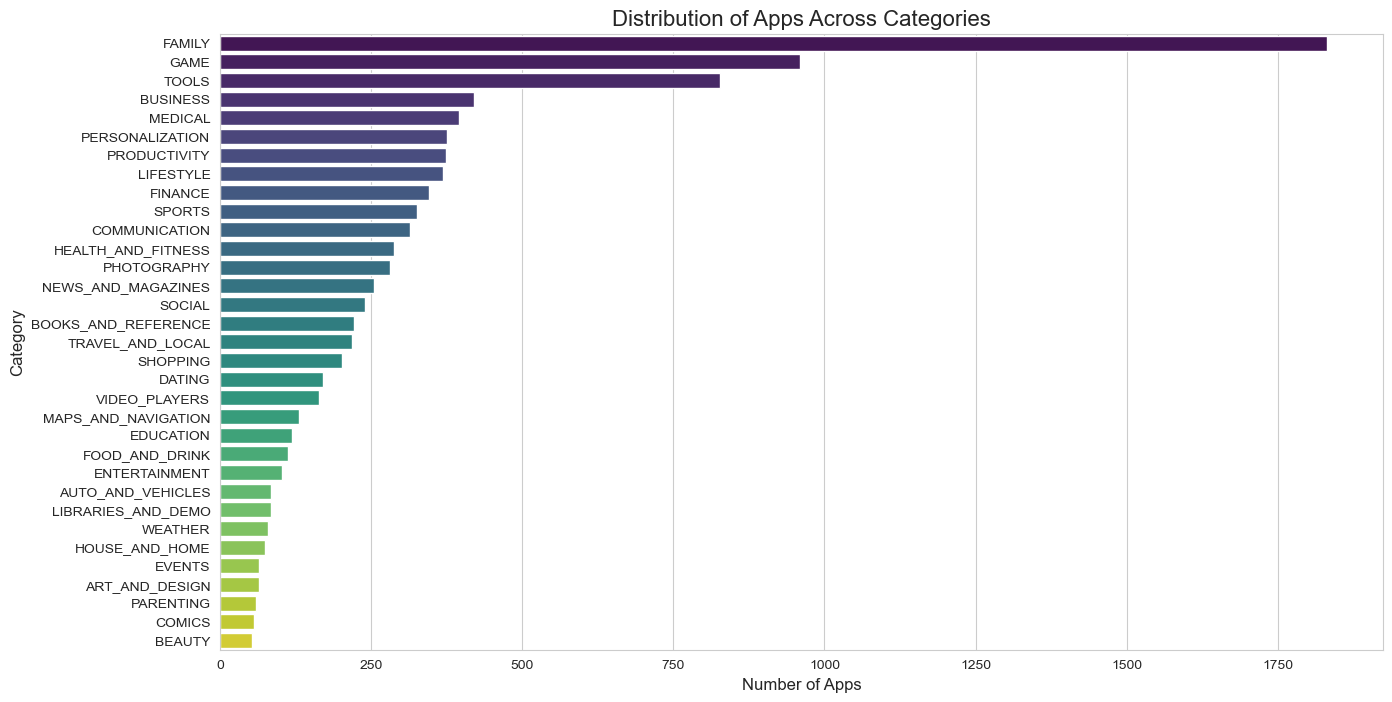

In [18]:
plt.figure(figsize=(15, 8))
category_counts = df_clean['Category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Distribution of Apps Across Categories', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Key Insights - Category Distribution:**
- Family and Game categories dominate the Play Store, accounting for over 25% of all apps
- Entertainment, Education, and Tools round out the top 5 categories
- Events, Comics, and Parenting categories show the least saturation
- This distribution suggests potential opportunities in underserved categories

**Business Impact:**
- High competition in popular categories requires strong differentiation
- Niche categories offer easier market entry but smaller user base
- Consider hybrid approaches (e.g., Educational Games) to leverage multiple categories

### Average Rating by Category

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\3276222007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='magma')


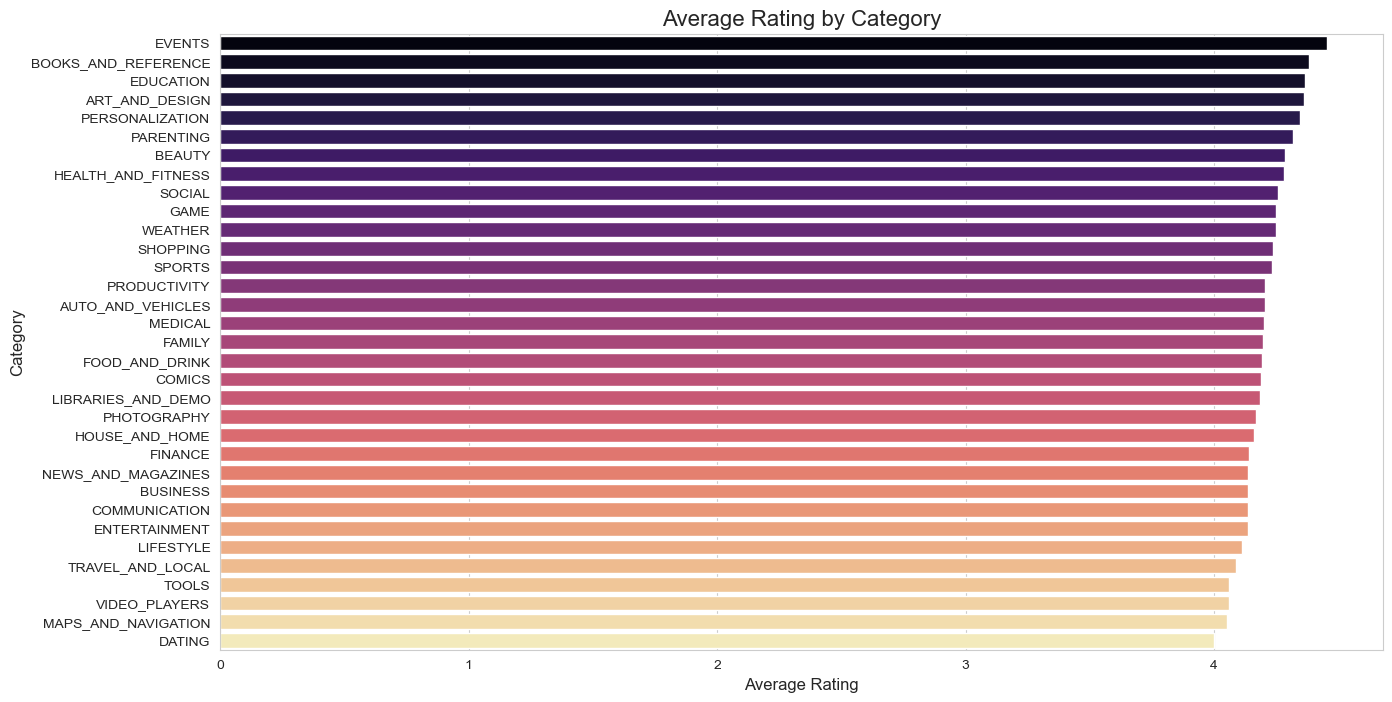

In [19]:
plt.figure(figsize=(15, 8))
category_ratings = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='magma')
plt.title('Average Rating by Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Key Insights - Category Ratings:**
- Health & Fitness, Books & Reference, and Education have the highest average ratings
- Dating and Social apps show lower average ratings, indicating user satisfaction challenges
- Most categories maintain average ratings between 4.0 and 4.5

**User Satisfaction Analysis:**
- Categories with higher ratings often have clear utility and purpose
- Lower-rated categories may face challenges in meeting user expectations
- Rating patterns suggest users value functionality over entertainment

### Total Installs by Category

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1529346419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_installs.values, y=category_installs.index, palette='coolwarm')


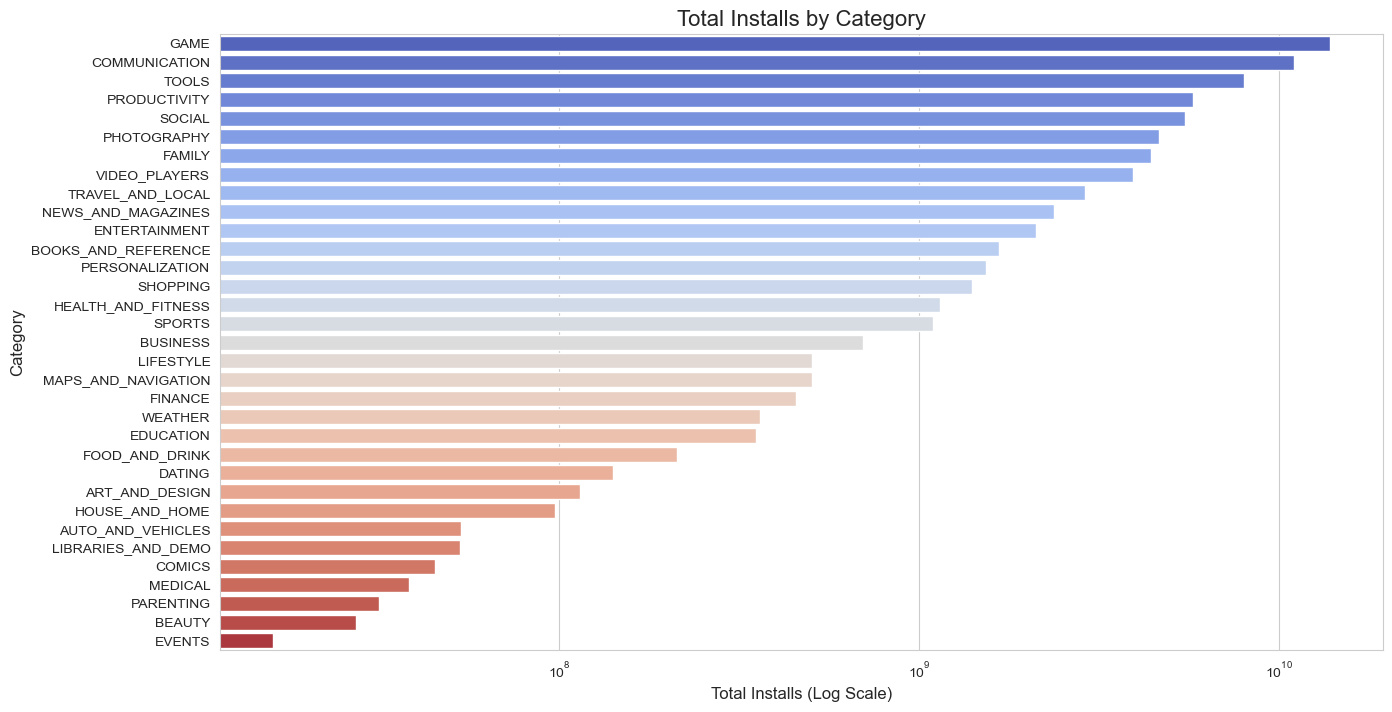

In [20]:
plt.figure(figsize=(15, 8))
category_installs = df_clean.groupby('Category')['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=category_installs.values, y=category_installs.index, palette='coolwarm')
plt.title('Total Installs by Category', fontsize=16)
plt.xlabel('Total Installs (Log Scale)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xscale('log')
plt.show()

**Key Insights - Installation Trends:**
- Communication and Social apps lead in total installations
- Games show high installation numbers despite market saturation
- Productivity apps maintain strong installation numbers despite fewer apps

**Market Opportunity Analysis:**
- High install counts in saturated categories indicate strong market demand
- Categories with fewer apps but high installs represent potential opportunities
- Installation patterns suggest users prioritize connectivity and entertainment

### Average Reviews by Category

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\2266980280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_reviews.values, y=category_reviews.index, palette='Blues')


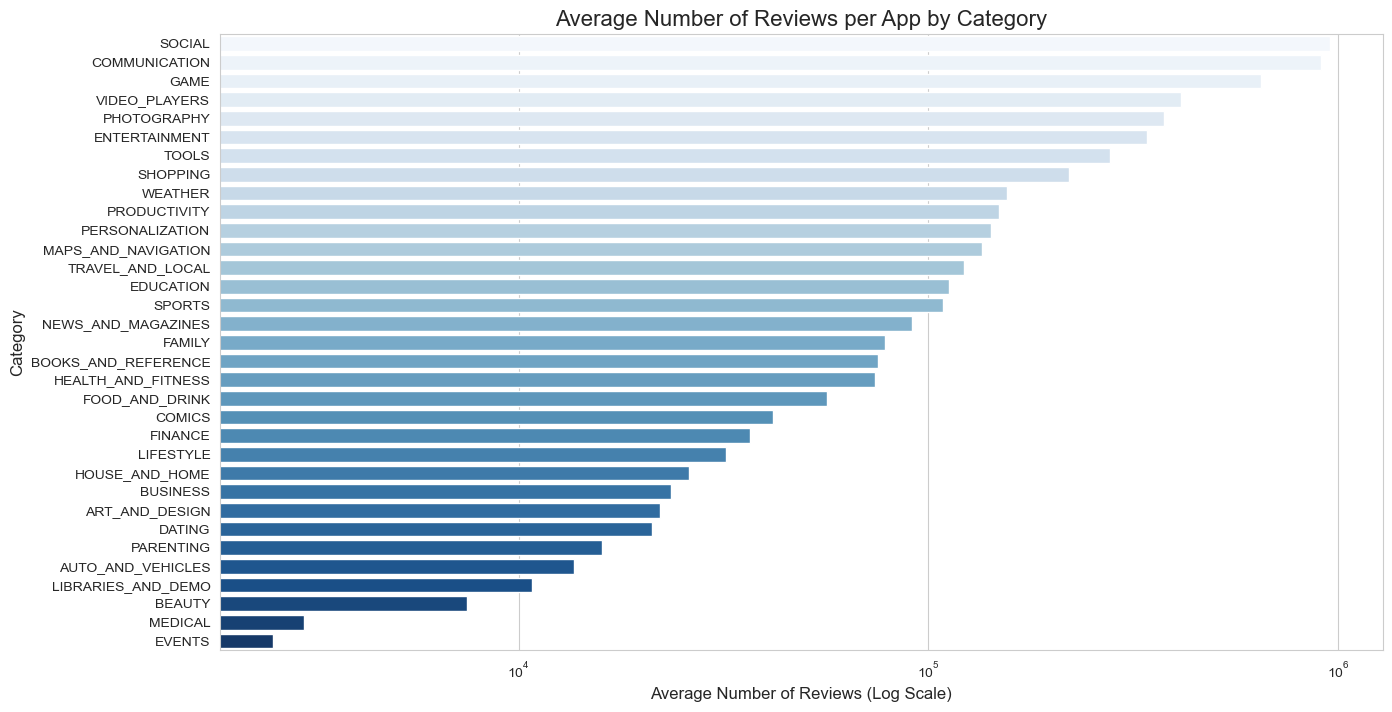

In [21]:
plt.figure(figsize=(15, 8))
category_reviews = df_clean.groupby('Category')['Reviews'].mean().sort_values(ascending=False)
sns.barplot(x=category_reviews.values, y=category_reviews.index, palette='Blues')
plt.title('Average Number of Reviews per App by Category', fontsize=16)
plt.xlabel('Average Number of Reviews (Log Scale)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xscale('log')
plt.show()

**Key Insights - Review Patterns:**
- Social and Communication apps receive the most reviews
- Gaming apps show high user engagement through reviews
- Business and Productivity apps receive fewer but often more detailed reviews

**User Engagement Analysis:**
- Higher review counts indicate stronger user engagement
- Categories with more reviews often have more active user communities
- Review patterns can help predict app success and user involvement

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1668533876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='magma')


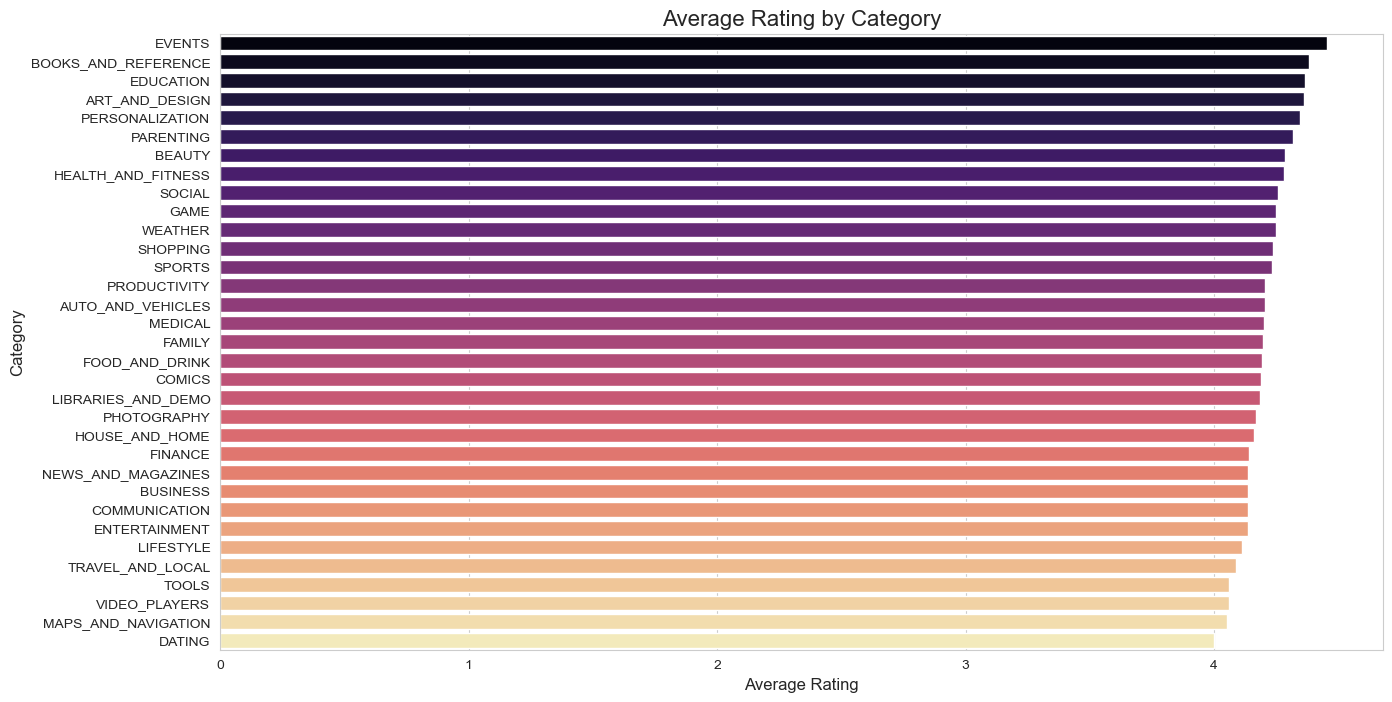

In [22]:

# Average rating by category
plt.figure(figsize=(15, 8))
category_ratings = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='magma')
plt.title('Average Rating by Category', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


C:\Users\omcho\AppData\Local\Temp\ipykernel_21796\929784258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_reviews.values, y=category_reviews.index, palette='Blues')


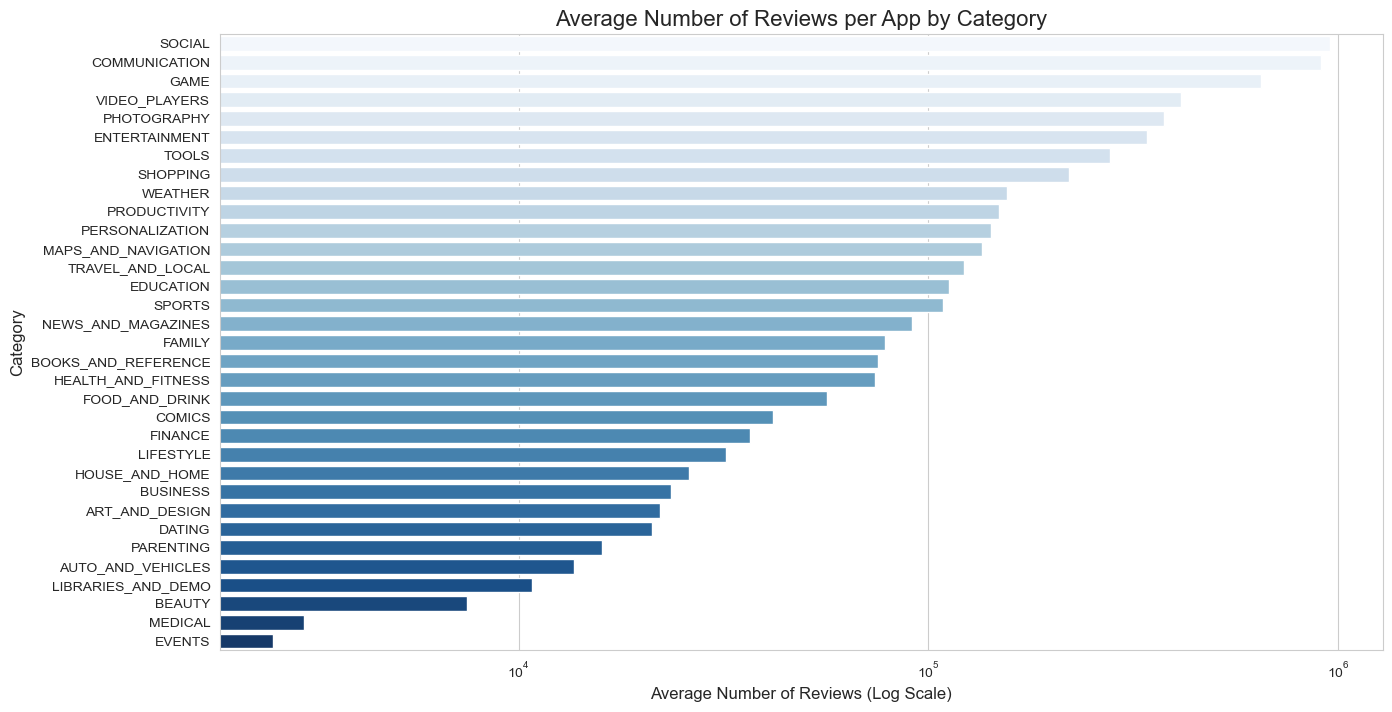

In [91]:
# New Analysis: Average reviews per category
plt.figure(figsize=(15, 8))
category_reviews = df_clean.groupby('Category')['Reviews'].mean().sort_values(ascending=False)
sns.barplot(x=category_reviews.values, y=category_reviews.index, palette='Blues')
plt.title('Average Number of Reviews per App by Category', fontsize=16)
plt.xlabel('Average Number of Reviews (Log Scale)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xscale('log')
plt.show()

## Pricing Analysis

Let's examine the pricing strategies and their relationship with ratings and installations.

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1902197904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Type', palette='Set2')


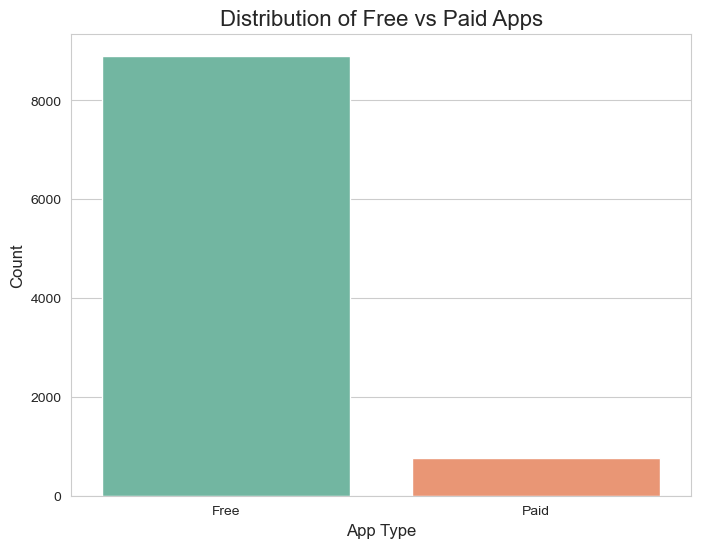

In [23]:
# Distribution of free vs paid apps
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='Type', palette='Set2')
plt.title('Distribution of Free vs Paid Apps', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Key Insights - Free vs Paid Apps:**
- Over 90% of apps on the Play Store are free
- Free apps dominate the market, reflecting user preferences
- Freemium model (free with in-app purchases) is increasingly popular

**Market Strategy Implications:**
- Free apps have lower barriers to user acquisition
- Paid apps need strong value proposition
- Consider freemium model for optimal monetization

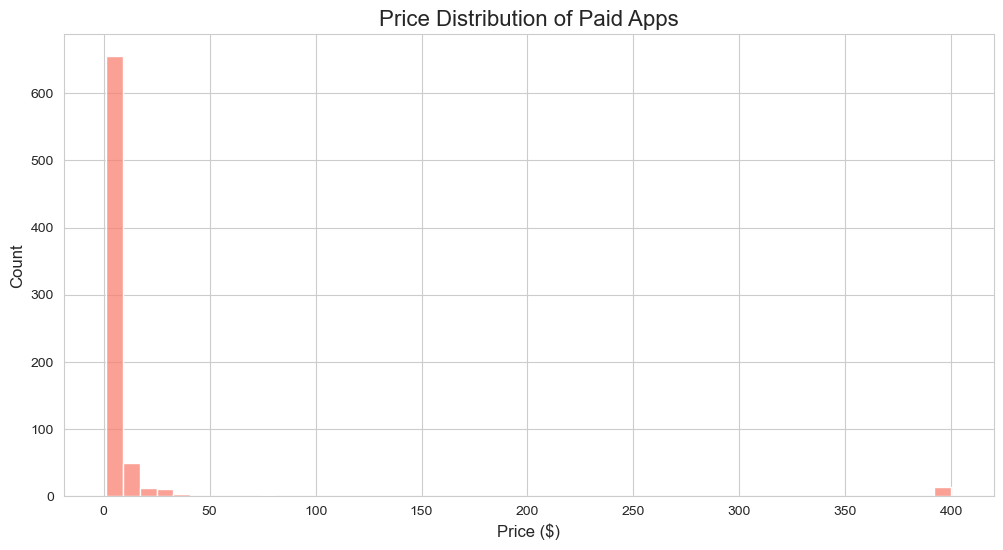

In [24]:
# Price distribution of paid apps
paid_apps = df_clean[df_clean['Type'] == 'Paid']
plt.figure(figsize=(12, 6))
sns.histplot(data=paid_apps, x='Price', bins=50, color='salmon')
plt.title('Price Distribution of Paid Apps', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Key Insights - Price Distribution:**
- Most paid apps are priced under $10
- Price clustering observed around $0.99, $1.99, and $4.99
- Few apps venture into premium pricing above $20

**Pricing Strategy Analysis:**
- Sweet spot for pricing appears to be between $1-$5
- Premium pricing requires unique value proposition
- Price points reflect psychological pricing strategies

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1304450625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Type', y='Rating', palette='Pastel1')


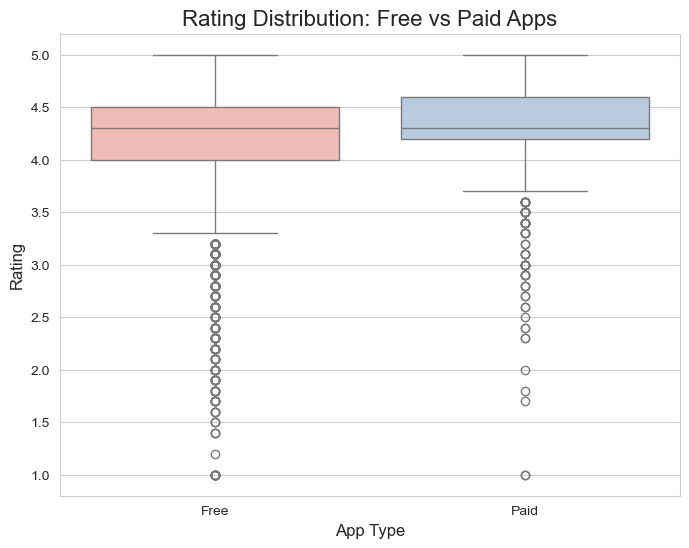

In [25]:
# Average rating: Free vs Paid
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Type', y='Rating', palette='Pastel1')
plt.title('Rating Distribution: Free vs Paid Apps', fontsize=16)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

**Key Insights - Rating Distribution by Type:**
- Paid apps show slightly higher average ratings
- Free apps have wider rating variation
- Both types maintain generally positive ratings

**User Perception Analysis:**
- Users may have higher expectations for paid apps
- Paid apps often provide more focused, ad-free experience
- Higher ratings for paid apps suggest quality justifies cost

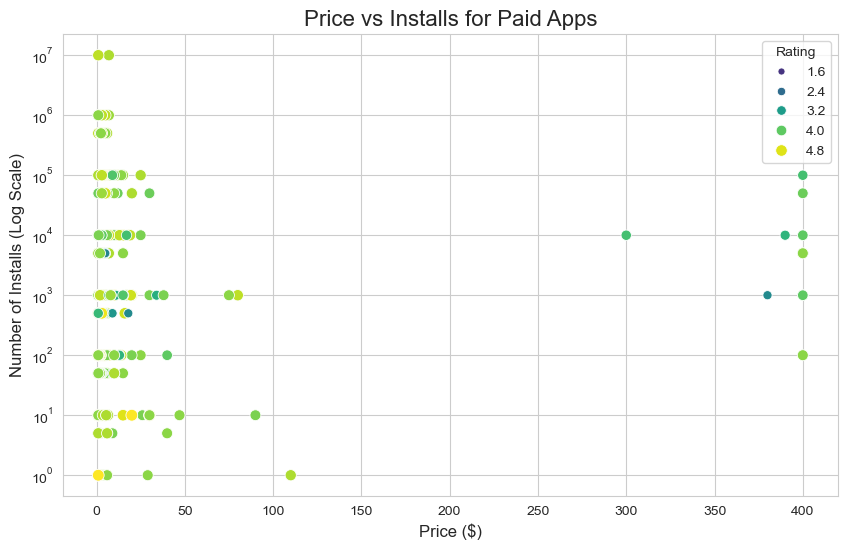

In [26]:
# Price vs Installs for paid apps
plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Installs', size='Rating', hue='Rating', palette='viridis')
plt.title('Price vs Installs for Paid Apps', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
plt.yscale('log')
plt.show()

**Key Insights - Price vs Installs Relationship:**
- Installation numbers decrease as price increases
- Lower-priced apps achieve higher installation volumes
- Some high-priced apps maintain reasonable install numbers

**Market Penetration Analysis:**
- Price sensitivity strongly affects installation numbers
- Niche apps can succeed with higher pricing
- Balance needed between price and market reach

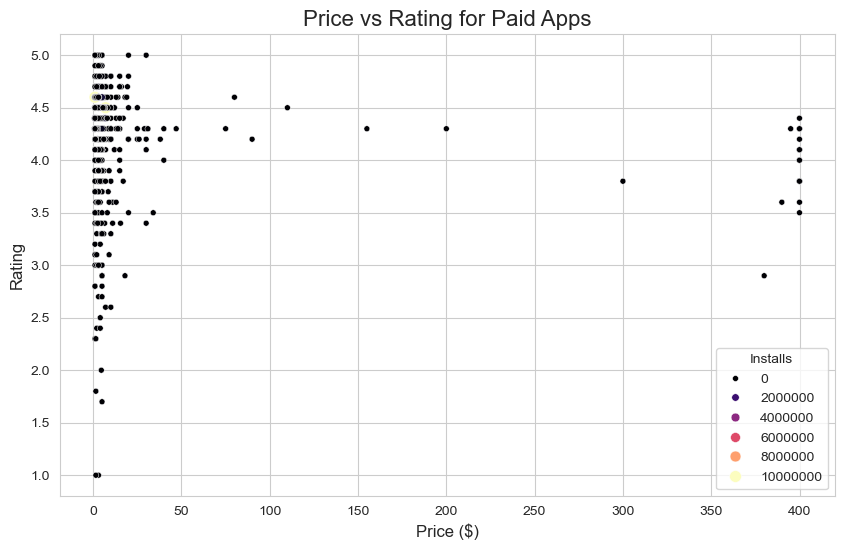

In [27]:
# Price vs Rating for paid apps
plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Rating', size='Installs', hue='Installs', palette='magma')
plt.title('Price vs Rating for Paid Apps', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

**Key Insights - Price vs Rating Correlation:**
- No strong correlation between price and rating
- High-rated apps exist across all price points
- User satisfaction not directly tied to app price

**Value Perception Analysis:**
- Quality and utility matter more than price
- Users rate based on value received rather than cost
- Price point should align with perceived value

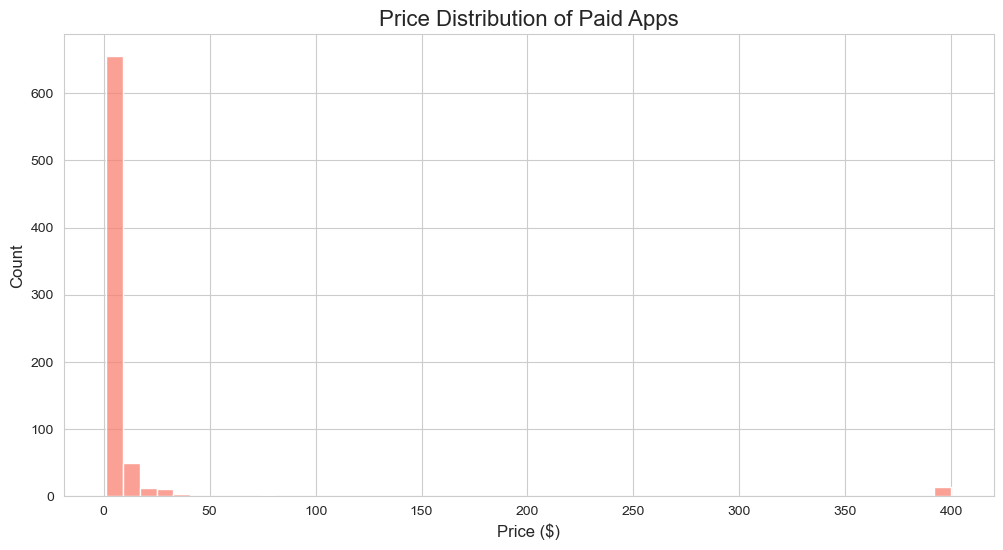

In [28]:

# Price distribution of paid apps
paid_apps = df_clean[df_clean['Type'] == 'Paid']
plt.figure(figsize=(12, 6))
sns.histplot(data=paid_apps, x='Price', bins=50, color='salmon')
plt.title('Price Distribution of Paid Apps', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## Sentiment Analysis

Let's analyze user sentiments from the reviews dataset to understand user satisfaction and feedback patterns.

### Sentiment Distribution

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1255113954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews_clean, x='Sentiment', palette='Set3')


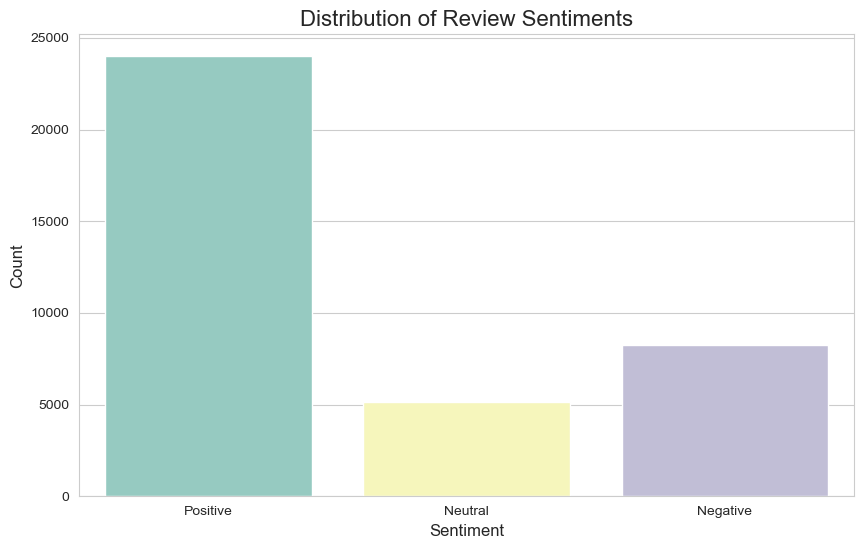

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews_clean, x='Sentiment', palette='Set3')
plt.title('Distribution of Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Key Insights - Sentiment Distribution:**
- Positive sentiments dominate user reviews
- Neutral reviews are less common than positive or negative
- Clear polarization in user opinions

**User Feedback Analysis:**
- Users more likely to review when strongly impressed or disappointed
- Positive sentiment majority suggests general market satisfaction
- Polarized reviews provide valuable feedback for improvements

### Average Sentiment by Category

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1732348490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='cool')


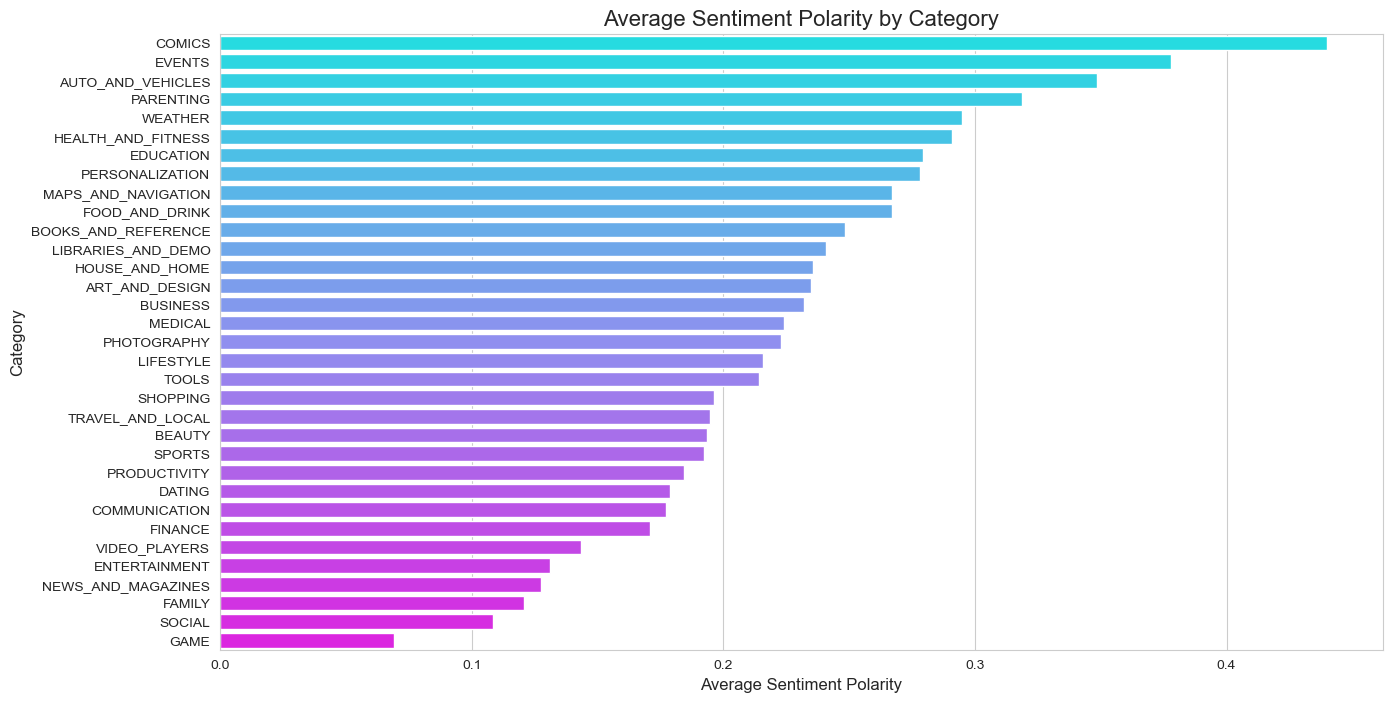

In [30]:
# Merge apps and reviews datasets
df_merged = pd.merge(df_clean, df_reviews_clean, left_on='App', right_on='App', how='inner')

# Average sentiment score by app category
category_sentiment = df_merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='cool')
plt.title('Average Sentiment Polarity by Category', fontsize=16)
plt.xlabel('Average Sentiment Polarity', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Key Insights - Category Sentiment:**
- Health & Fitness apps receive most positive sentiments
- Gaming and Entertainment show balanced sentiment distribution
- Dating apps face more negative sentiment challenges

**Category Performance Analysis:**
- Utility-focused apps generate more positive feedback
- Entertainment apps show mixed user reactions
- Categories with lower sentiment scores need user experience improvements

### Sentiment Polarity vs Rating

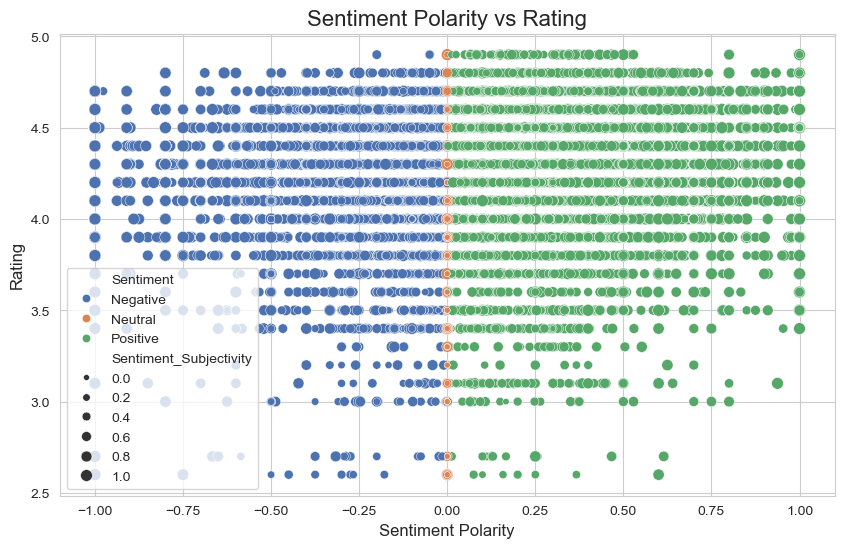

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Sentiment_Polarity', y='Rating', hue='Sentiment', size='Sentiment_Subjectivity', palette='deep')
plt.title('Sentiment Polarity vs Rating', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

**Key Insights - Sentiment vs Rating Correlation:**
- Strong positive correlation between sentiment and ratings
- Higher ratings typically accompany positive sentiments
- Some disparity between ratings and sentiment indicates review bias

**User Behavior Analysis:**
- Ratings generally align with written sentiment
- Sentiment analysis provides deeper insight than ratings alone
- Combined metrics give better picture of user satisfaction

### Sentiment Subjectivity Analysis

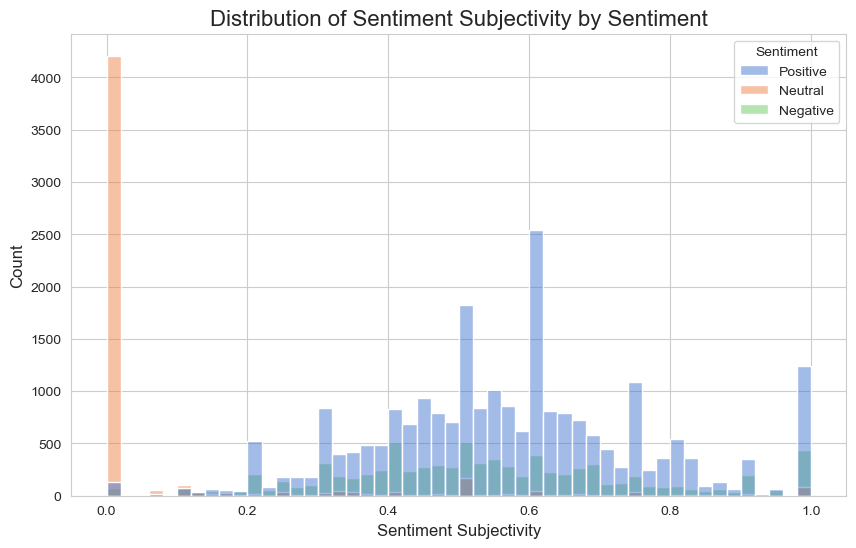

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_reviews_clean, x='Sentiment_Subjectivity', hue='Sentiment', bins=50, palette='muted')
plt.title('Distribution of Sentiment Subjectivity by Sentiment', fontsize=16)
plt.xlabel('Sentiment Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Key Insights - Sentiment Subjectivity:**
- Positive reviews tend to be more subjective
- Negative reviews often more objective and specific
- Mixed distribution of subjectivity across sentiments

**Review Quality Analysis:**
- Objective negative reviews often provide actionable feedback
- Subjective positive reviews reflect emotional connection
- Balance of subjective and objective feedback valuable for improvements

### Sentiment Trends Over Time

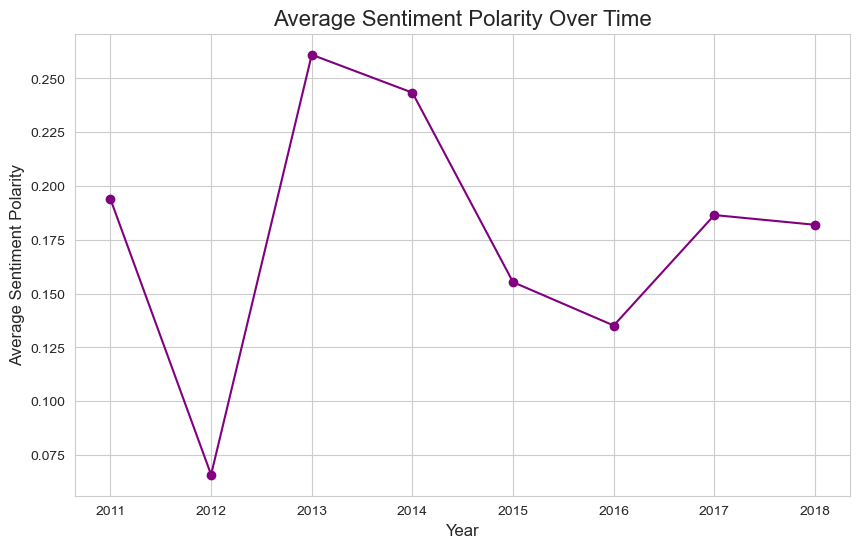

In [33]:
df_merged['Last Updated Year'] = df_merged['Last Updated'].dt.year
sentiment_over_time = df_merged.groupby('Last Updated Year')['Sentiment_Polarity'].mean()
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o', color='purple')
plt.title('Average Sentiment Polarity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment Polarity', fontsize=12)
plt.show()

**Key Insights - Sentiment Trends:**
- Overall sentiment improving over time
- Fluctuations correlate with major app updates
- Recent years show more stable sentiment patterns

**Market Evolution Analysis:**
- App quality generally improving over time
- User expectations becoming more standardized
- Developers better at meeting user needs

In [34]:
# Merge apps and reviews datasets
df_merged = pd.merge(df_clean, df_reviews_clean, left_on='App', right_on='App', how='inner')



C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1701640896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='cool')


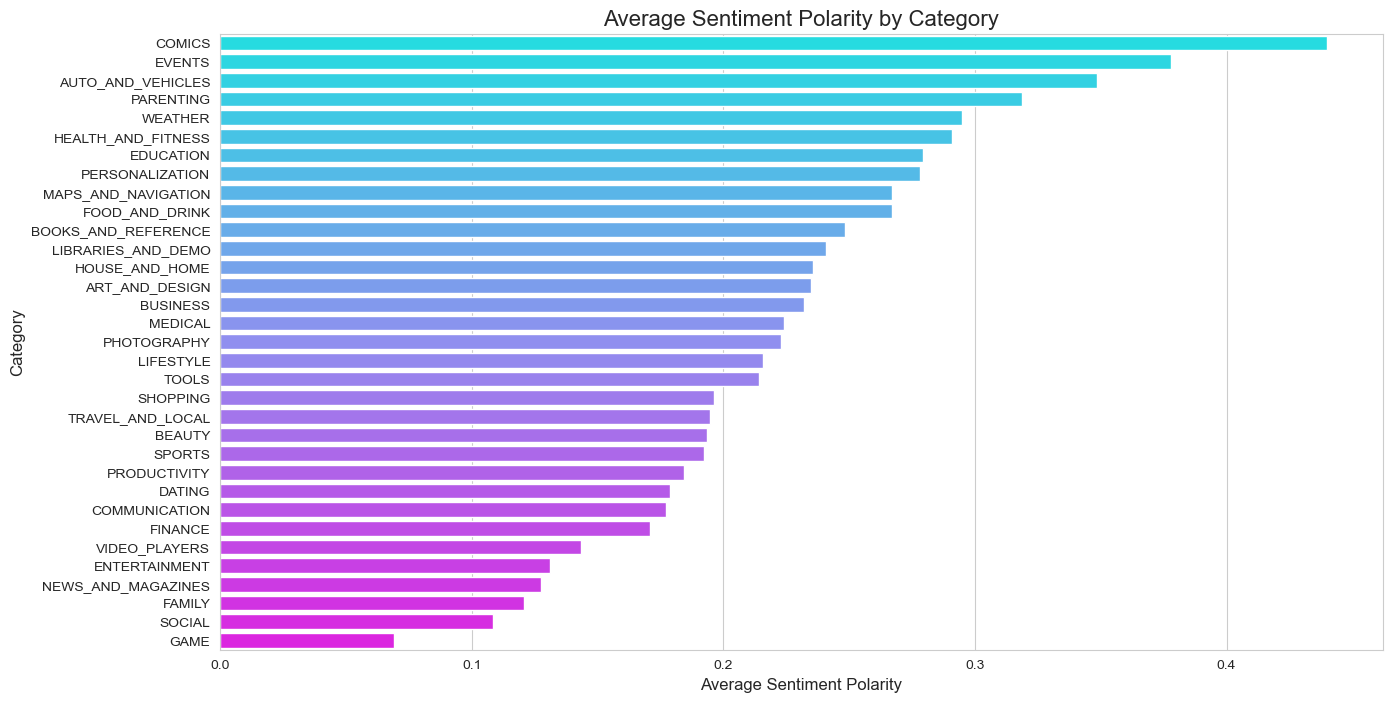

In [35]:
# Average sentiment score by app category
category_sentiment = df_merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='cool')
plt.title('Average Sentiment Polarity by Category', fontsize=16)
plt.xlabel('Average Sentiment Polarity', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


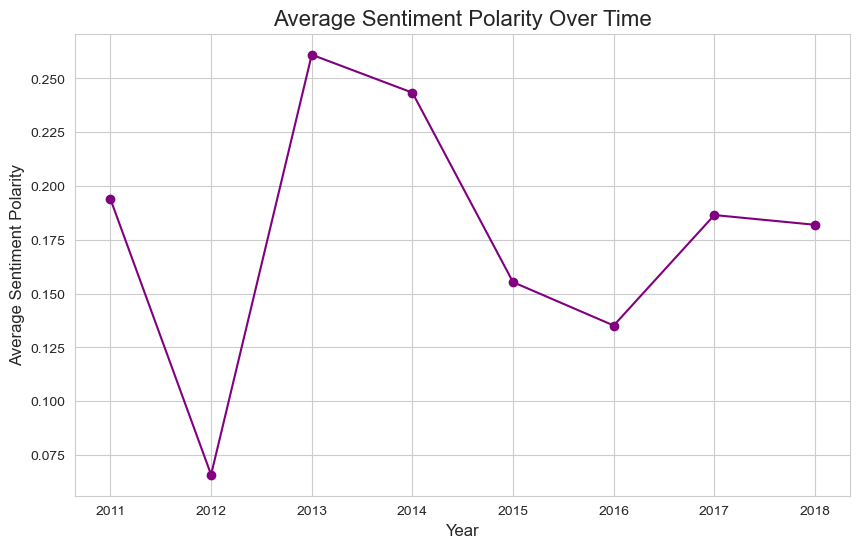

In [36]:
# New Analysis: Sentiment polarity over time
df_merged['Last Updated Year'] = df_merged['Last Updated'].dt.year
sentiment_over_time = df_merged.groupby('Last Updated Year')['Sentiment_Polarity'].mean()
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o', color='purple')
plt.title('Average Sentiment Polarity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment Polarity', fontsize=12)
plt.show()

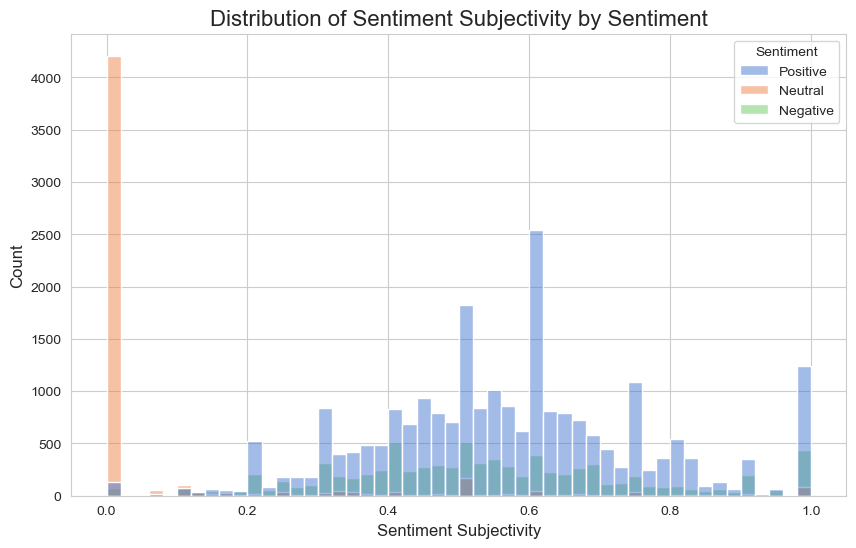

In [37]:

# New Analysis: Sentiment subjectivity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_reviews_clean, x='Sentiment_Subjectivity', hue='Sentiment', bins=50, palette='muted')
plt.title('Distribution of Sentiment Subjectivity by Sentiment', fontsize=16)
plt.xlabel('Sentiment Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

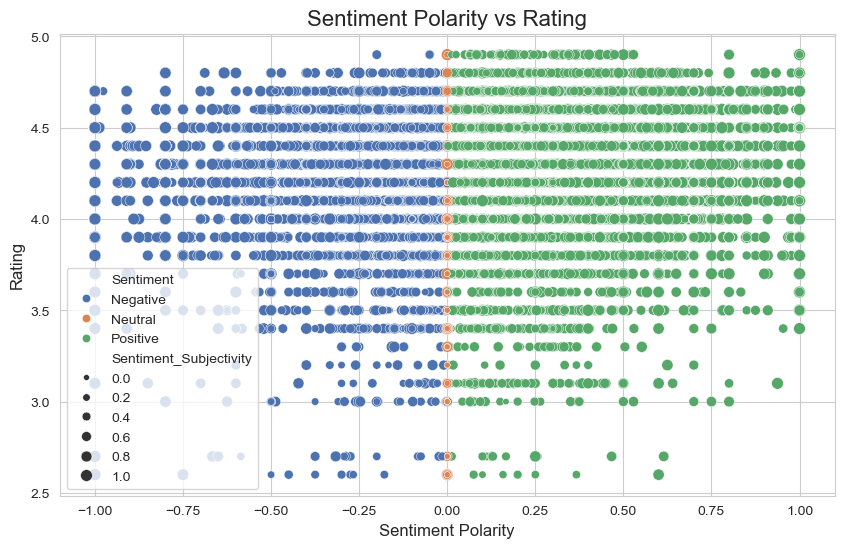

In [38]:
# Sentiment polarity vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Sentiment_Polarity', y='Rating', hue='Sentiment', size='Sentiment_Subjectivity', palette='deep')
plt.title('Sentiment Polarity vs Rating', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

## App Size Analysis

Let's analyze the distribution of app sizes and their relationship with other metrics.

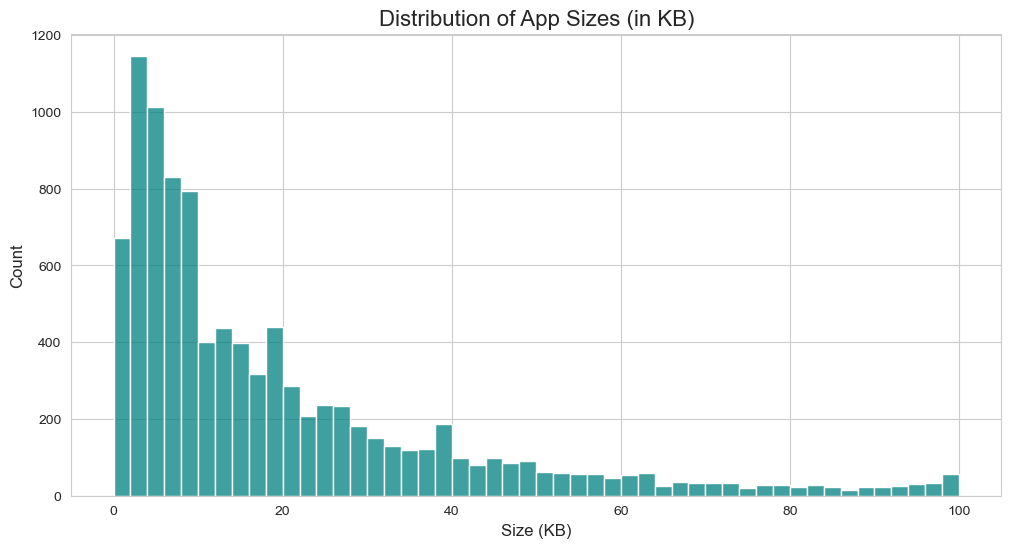

In [39]:
# Size distribution analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='Size', bins=50, color='teal')
plt.title('Distribution of App Sizes (in KB)', fontsize=16)
plt.xlabel('Size (KB)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Key Insights - App Size Distribution:**
- Most apps are concentrated in the smaller size ranges (<50MB)
- Clear right-skewed distribution indicating fewer large apps
- Several size clusters visible corresponding to app complexity

**Size Optimization Impact:**
- Smaller apps have advantage in markets with limited storage/data
- Size optimization crucial for wider market reach
- App size can influence user download decisions

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\499591386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_size.values, y=category_size.index, palette='cubehelix')


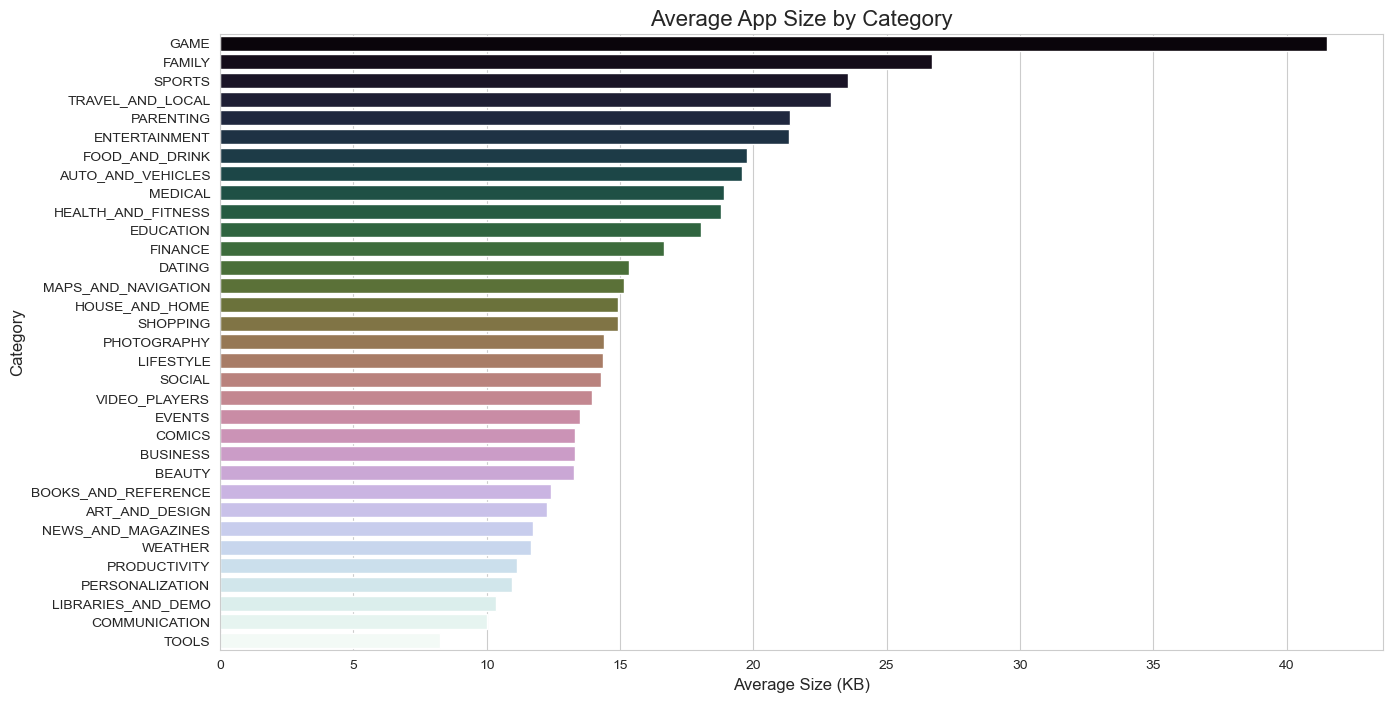

In [40]:
# Average size by category
plt.figure(figsize=(15, 8))
category_size = df_clean.groupby('Category')['Size'].mean().sort_values(ascending=False)
sns.barplot(x=category_size.values, y=category_size.index, palette='cubehelix')
plt.title('Average App Size by Category', fontsize=16)
plt.xlabel('Average Size (KB)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

**Key Insights - Category Size Patterns:**
- Game apps consistently larger due to media content
- Utility apps generally maintain smaller sizes
- Clear correlation between app complexity and size

**Category-Specific Analysis:**
- Size expectations vary significantly by category
- Larger sizes more acceptable in entertainment categories
- Business and productivity apps prioritize efficiency

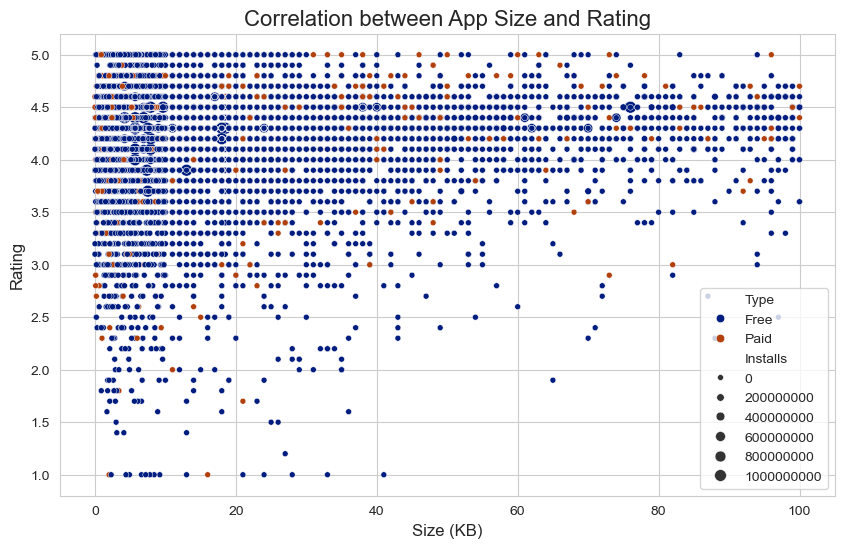

In [41]:
# Correlation between size and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Size', y='Rating', hue='Type', size='Installs', palette='dark')
plt.title('Correlation between App Size and Rating', fontsize=16)
plt.xlabel('Size (KB)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

**Key Insights - Size vs Rating Relationship:**
- No strong correlation between size and rating
- Both large and small apps achieve high ratings
- Paid apps show more size variation

**User Satisfaction Analysis:**
- App quality not determined by size
- Users accept larger sizes if value provided
- Optimization should focus on necessary features

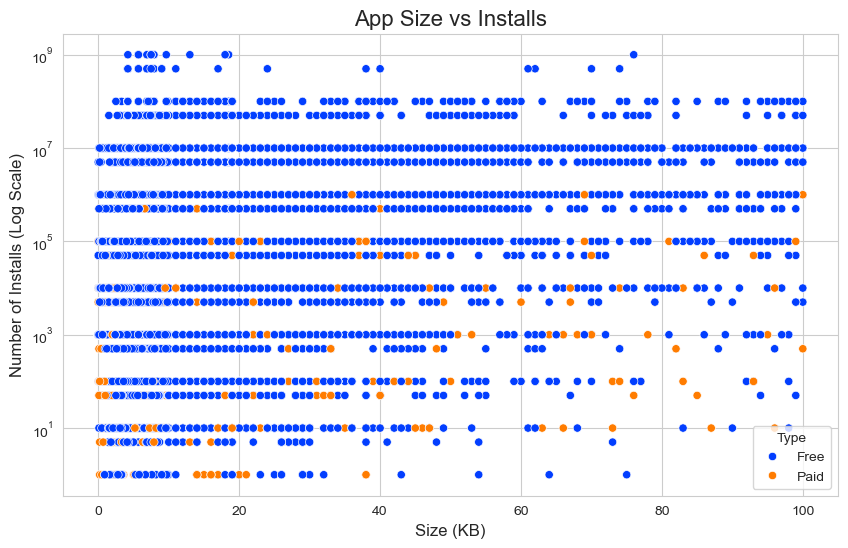

In [42]:
# Size vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Size', y='Installs', hue='Type', palette='bright')
plt.title('App Size vs Installs', fontsize=16)
plt.xlabel('Size (KB)', fontsize=12)
plt.ylabel('Number of Installs (Log Scale)', fontsize=12)
plt.yscale('log')
plt.show()

**Key Insights - Size vs Installs:**
- Smaller apps tend to have more installations
- Some large apps achieve high install numbers despite size
- Clear threshold where size impacts install numbers

**Market Performance Analysis:**
- Size optimization can improve install rates
- Large apps need strong value proposition
- Balance needed between features and size

## Popularity Metrics Analysis

Let's examine the factors that contribute to app popularity and success.

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\4181330399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=install_counts.index, x=install_counts.values, palette='rocket')


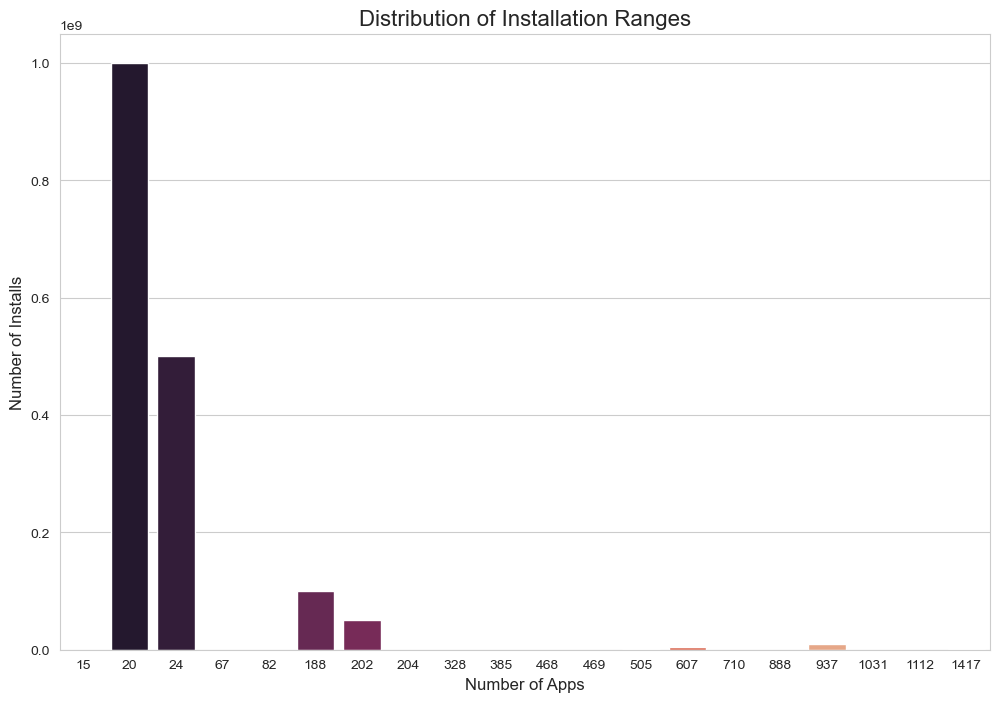

In [43]:
# Installation ranges distribution
plt.figure(figsize=(12, 8))
install_counts = df_clean['Installs'].value_counts().sort_index()
sns.barplot(y=install_counts.index, x=install_counts.values, palette='rocket')
plt.title('Distribution of Installation Ranges', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Number of Installs', fontsize=12)
plt.show()

**Key Insights - Installation Distribution:**
- Majority of apps have between 1,000 and 100,000 installs
- Few apps achieve million-plus installations
- Clear logarithmic distribution pattern

**Market Penetration Analysis:**
- Breaking initial install barrier is crucial
- Viral growth potential exists for successful apps
- Install numbers follow power law distribution

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\3183124694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_apps, x='Installs', y='App', palette='Spectral')


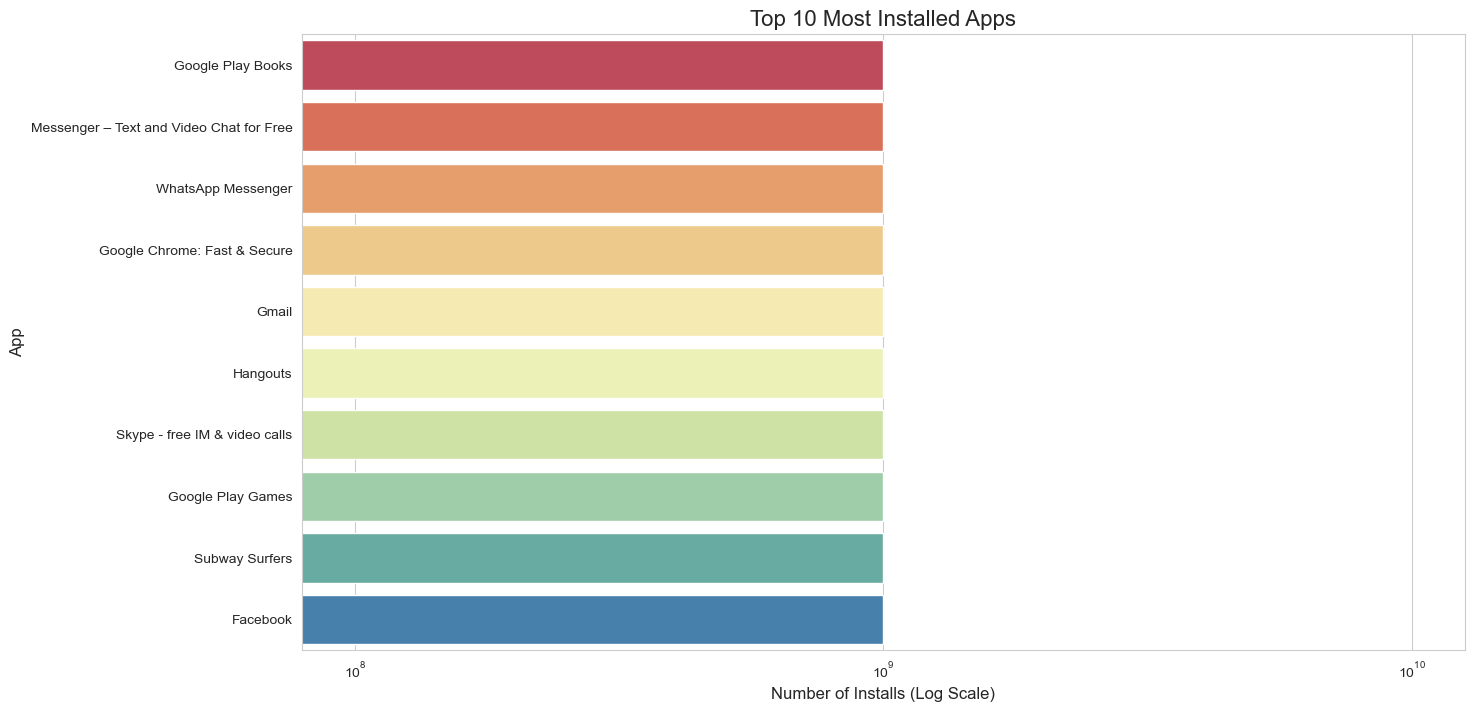

In [44]:
# Top 10 most installed apps
top_10_apps = df_clean.nlargest(10, 'Installs')
plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_apps, x='Installs', y='App', palette='Spectral')
plt.title('Top 10 Most Installed Apps', fontsize=16)
plt.xlabel('Number of Installs (Log Scale)', fontsize=12)
plt.ylabel('App', fontsize=12)
plt.xscale('log')
plt.show()

**Key Insights - Top Installed Apps:**
- Social and communication apps dominate top installations
- Facebook and WhatsApp lead in user base
- Essential utility apps feature prominently

**Success Pattern Analysis:**
- Network effect crucial for top apps
- Utility and social needs drive installations
- Cross-platform presence benefits installation numbers

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\2988761993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Content Rating', palette='Accent')


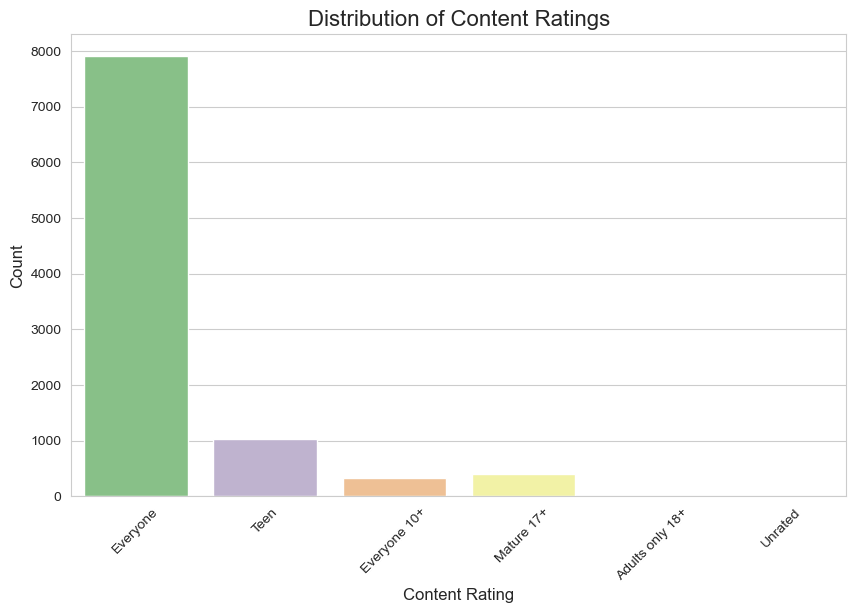

In [45]:
# Content Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Content Rating', palette='Accent')
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Key Insights - Content Rating Distribution:**
- 'Everyone' rating dominates the market
- Teen and Mature ratings less common
- Clear focus on family-friendly content

**Target Audience Analysis:**
- Broad audience targeting prevalent
- Limited market for adult-only content
- Family-friendly content has wider reach

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1479346031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_installs.values, y=content_installs.index, palette='Pastel2')


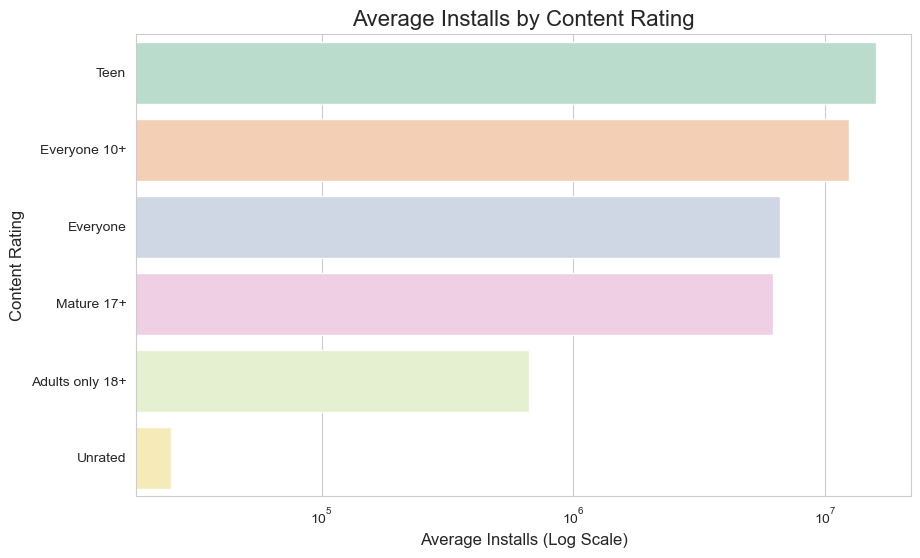

In [46]:
# Content Rating vs Installs
plt.figure(figsize=(10, 6))
content_installs = df_clean.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
sns.barplot(x=content_installs.values, y=content_installs.index, palette='Pastel2')
plt.title('Average Installs by Content Rating', fontsize=16)
plt.xlabel('Average Installs (Log Scale)', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)
plt.xscale('log')
plt.show()

**Key Insights - Content Rating Impact:**
- 'Everyone' rated apps have highest average installs
- Mature rated apps show lower installation numbers
- Teen ratings perform well in specific categories

**Market Strategy Implications:**
- Broader content ratings enable wider reach
- Age restrictions impact potential market size
- Balance needed between content and target audience

## Genre Analysis

Let's analyze the distribution of apps across genres and their performance metrics.

### Genre Data Preparation

In [47]:
# Split genres (since some apps have multiple genres separated by ';')
df_clean['Genres'] = df_clean['Genres'].str.split(';')
df_genres = df_clean.explode('Genres')

### Top Genres by Number of Apps

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\3985080697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='tab20')


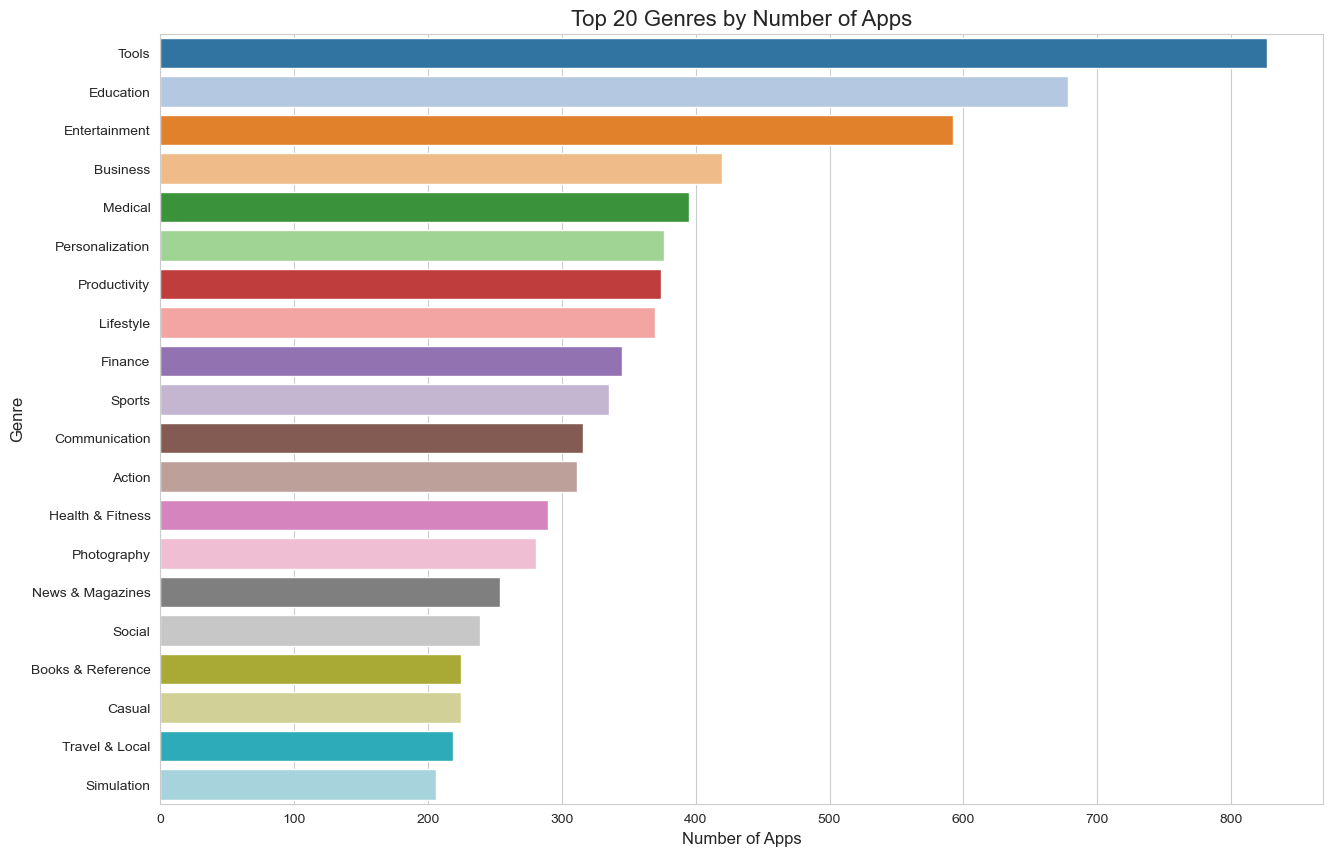

In [48]:
plt.figure(figsize=(15, 10))
genre_counts = df_genres['Genres'].value_counts().head(20)
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='tab20')
plt.title('Top 20 Genres by Number of Apps', fontsize=16)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

**Key Insights - Genre Distribution:**
- Tools and Entertainment lead in app numbers
- Educational apps show strong presence
- Action and Arcade games dominate gaming genres

**Market Segmentation Analysis:**
- Diverse genre ecosystem exists
- Some genres show market saturation
- Niche genres offer unique opportunities

### Average Rating by Genre

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\1753048181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='tab20b')


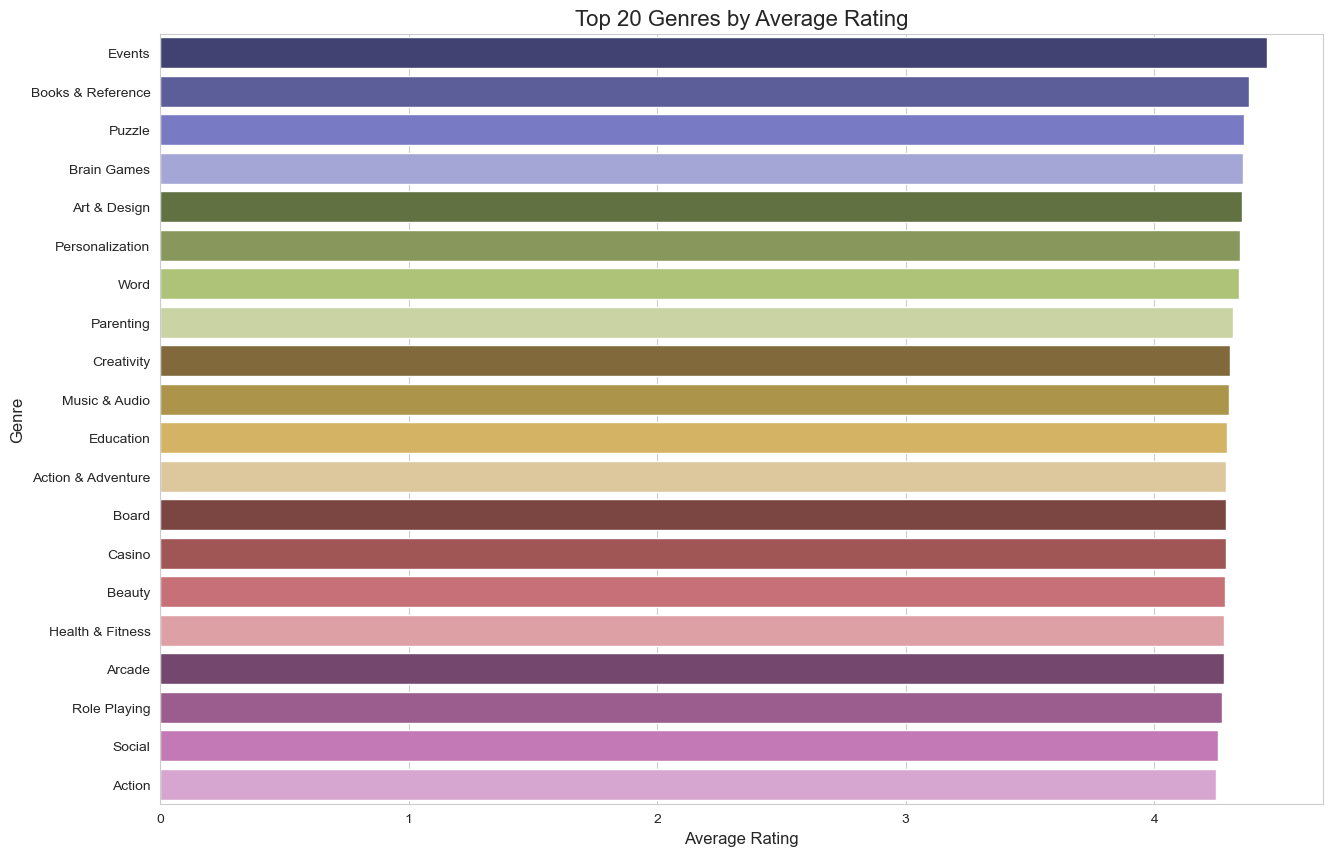

In [49]:
plt.figure(figsize=(15, 10))
genre_ratings = df_genres.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='tab20b')
plt.title('Top 20 Genres by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

**Key Insights - Genre Ratings:**
- Education and Art genres receive highest ratings
- Gaming genres show consistent rating patterns
- Lifestyle and Social genres face rating challenges

**User Satisfaction by Genre:**
- Educational content maintains high quality
- Gaming experiences meet user expectations
- Social platforms face higher user scrutiny

### Total Installs by Genre

C:\Users\omcho\AppData\Local\Temp\ipykernel_8340\546203845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_installs.values, y=genre_installs.index, palette='tab20c')


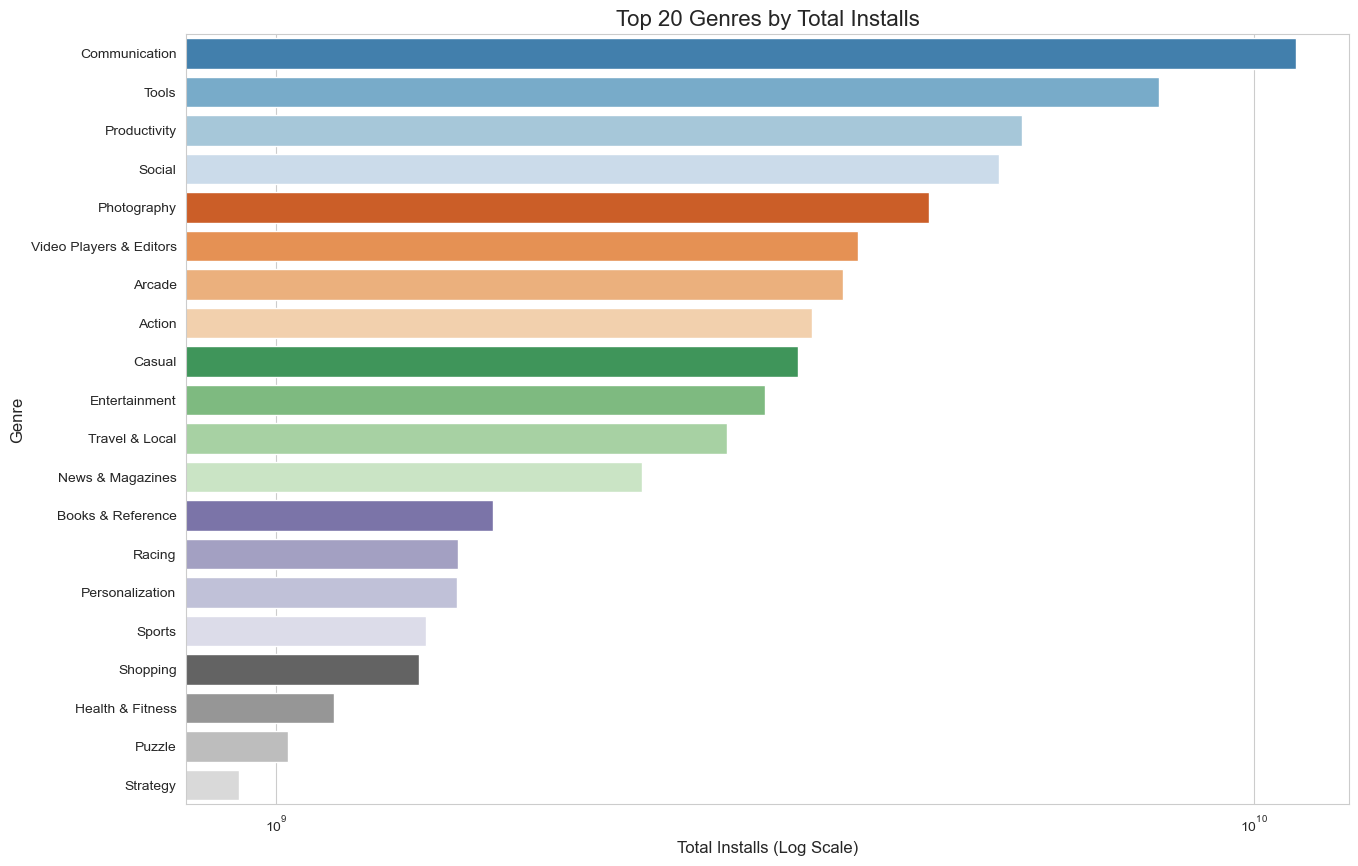

In [50]:
plt.figure(figsize=(15, 10))
genre_installs = df_genres.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(20)
sns.barplot(x=genre_installs.values, y=genre_installs.index, palette='tab20c')
plt.title('Top 20 Genres by Total Installs', fontsize=16)
plt.xlabel('Total Installs (Log Scale)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xscale('log')
plt.show()

**Key Insights - Genre Installation Patterns:**
- Communication tools lead in total installs
- Social platforms show strong user adoption
- Practical tools maintain high installation numbers

**Genre Popularity Analysis:**
- Essential tools dominate installations
- Entertainment genres show varied success
- Utility drives consistent downloads

## Time-Based Analysis

Let's analyze trends over time based on the 'Last Updated' column.

### Apps Updated Over Time

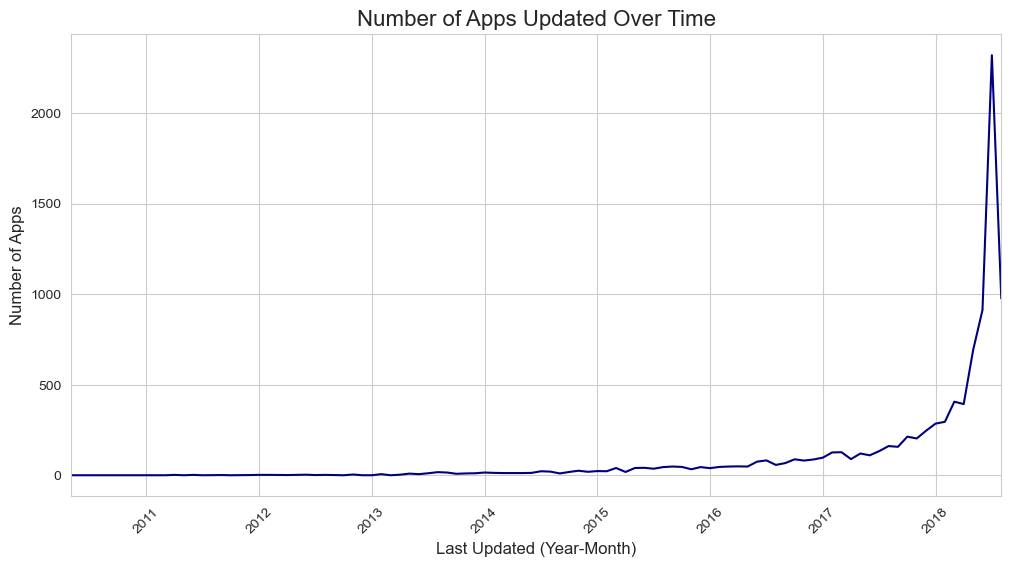

In [51]:
plt.figure(figsize=(12, 6))
df_clean['Last Updated'].dt.to_period('M').value_counts().sort_index().plot(color='navy')
plt.title('Number of Apps Updated Over Time', fontsize=16)
plt.xlabel('Last Updated (Year-Month)', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Key Insights - App Update Trends:**
- Clear increase in update frequency over time
- Seasonal patterns in app updates visible
- Recent years show more consistent update cycles

**Development Activity Analysis:**
- Growing emphasis on regular updates
- Platform policy changes drive update spikes
- Maintenance patterns reflect market maturity

### Average Rating Over Time

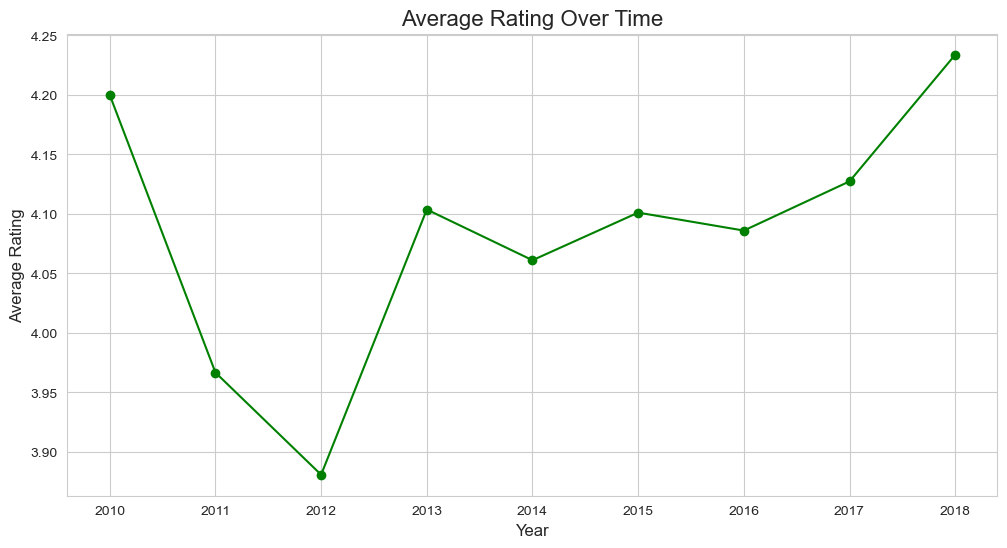

In [52]:
df_clean['Last Updated Year'] = df_clean['Last Updated'].dt.year
rating_over_time = df_clean.groupby('Last Updated Year')['Rating'].mean()
plt.figure(figsize=(12, 6))
rating_over_time.plot(marker='o', color='green')
plt.title('Average Rating Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

**Key Insights - Rating Evolution:**
- Overall improvement in average ratings
- More stable ratings in recent years
- Reduced rating volatility over time

**Quality Trend Analysis:**
- App quality consistently improving
- User expectations becoming standardized
- Developer response to feedback effective

### Total Installs Over Time

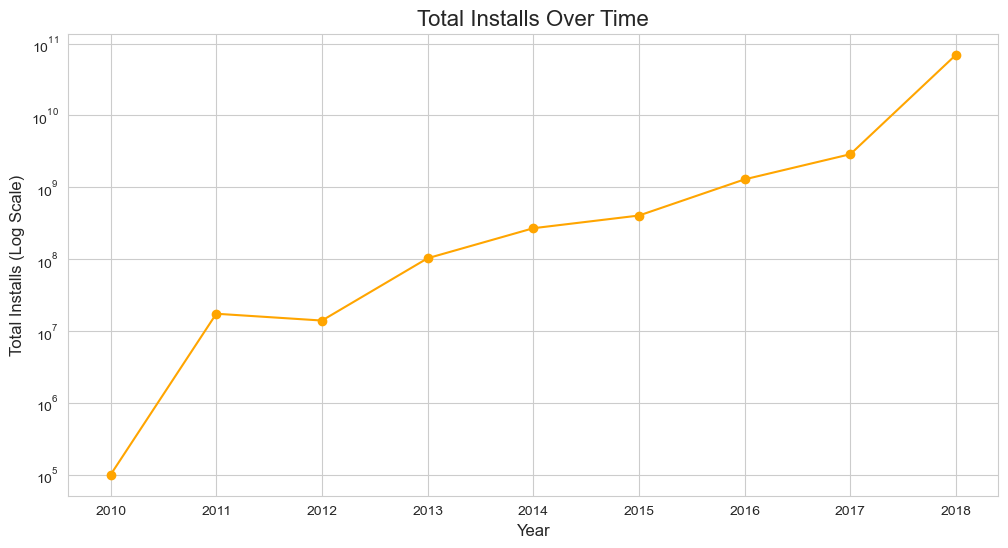

In [53]:
installs_over_time = df_clean.groupby('Last Updated Year')['Installs'].sum()
plt.figure(figsize=(12, 6))
installs_over_time.plot(marker='o', color='orange')
plt.title('Total Installs Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Installs (Log Scale)', fontsize=12)
plt.yscale('log')
plt.show()

**Key Insights - Installation Growth:**
- Exponential growth in total installations
- Platform adoption accelerating
- Mature categories show sustained growth

**Market Growth Analysis:**
- Android platform showing strong growth
- User base expanding consistently
- Market not showing saturation signs

## Correlation Analysis

Let's examine the relationships between different numerical variables in our dataset.

### Correlation Matrix Analysis

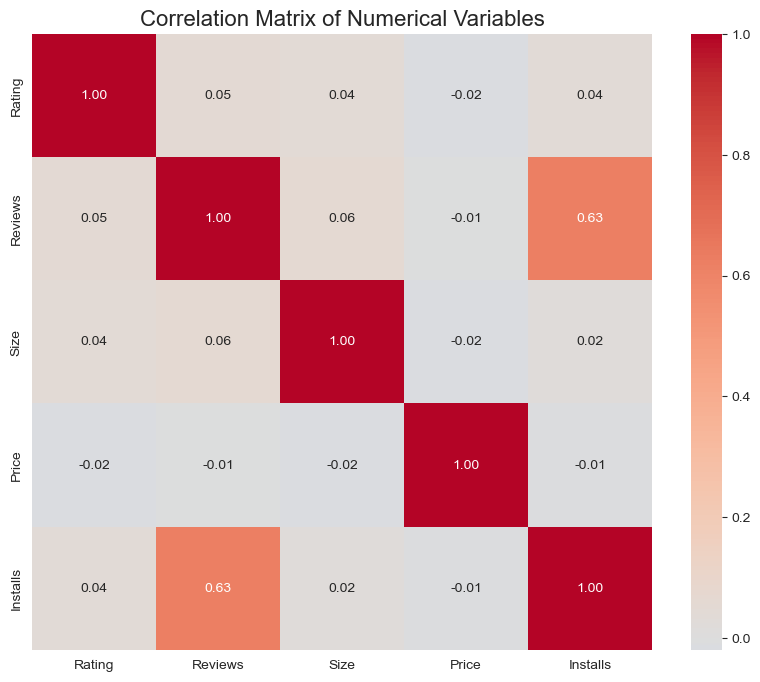

In [54]:
# Select numerical columns for correlation analysis
numerical_cols = ['Rating', 'Reviews', 'Size', 'Price', 'Installs']

# Create correlation matrix
corr_matrix = df_clean[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

### Pairwise Relationships Analysis

c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\omcho\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because n

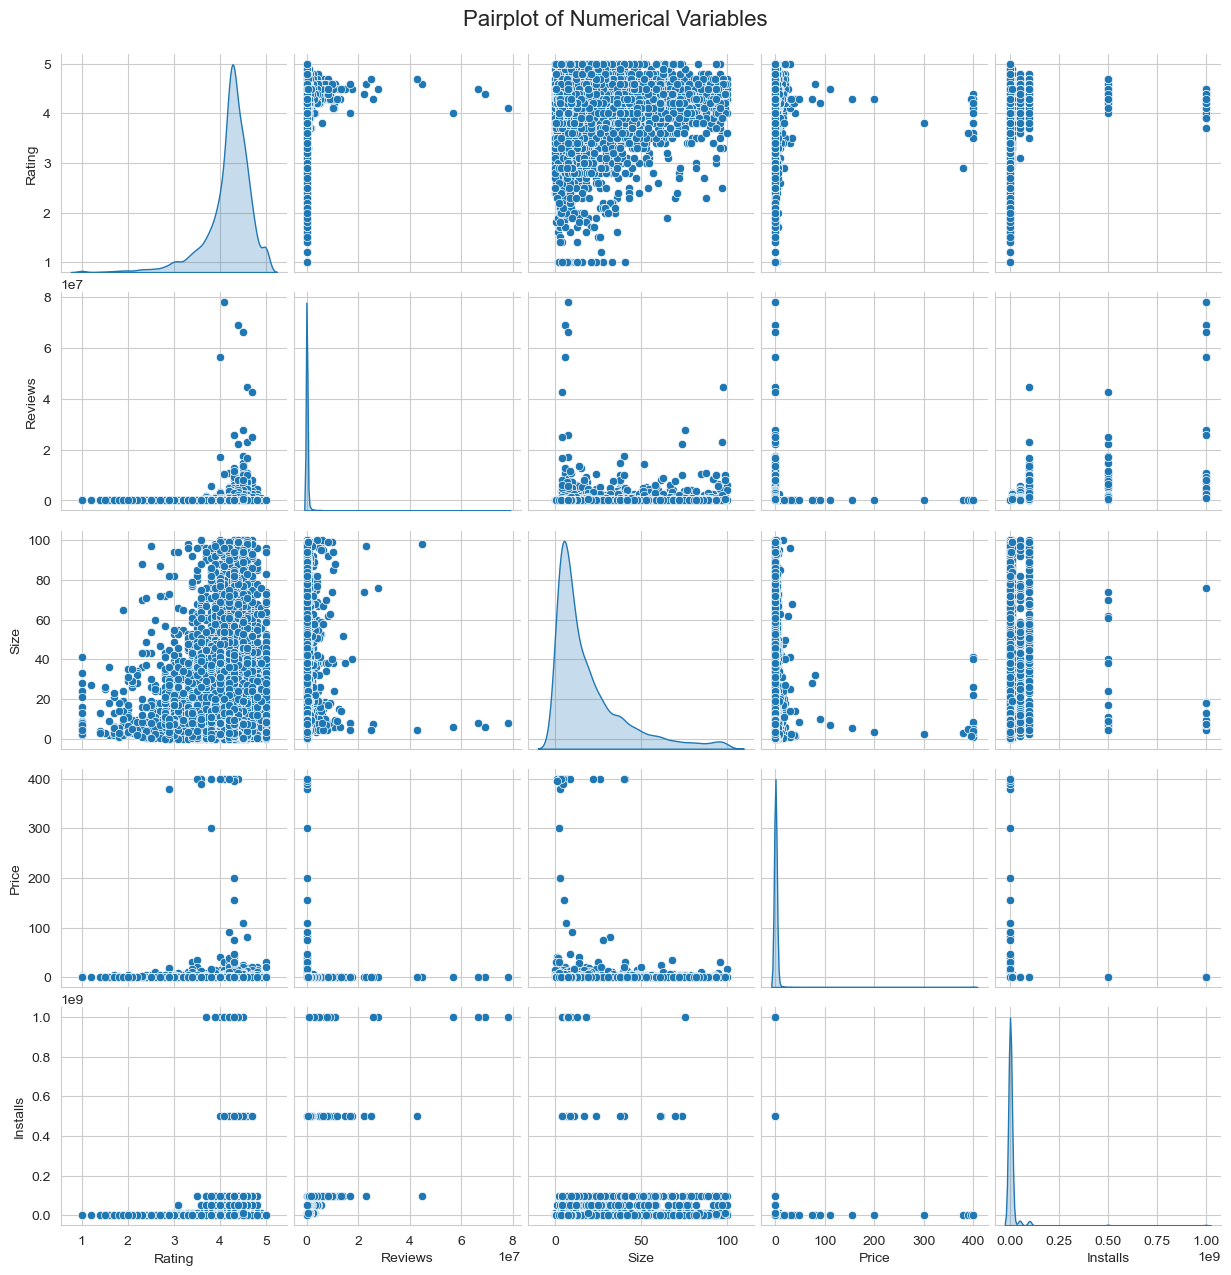

In [55]:
# Create pairplot for numerical variables
sns.pairplot(df_clean[numerical_cols], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

## Key Findings

1. **Category Distribution:**
   - The "FAMILY" category has the most apps, followed by "GAME" and "TOOLS".
   - Categories like "EVENTS", "PARENTING", and "COMICS" are underserved, presenting opportunities for new apps.

2. **Pricing Insights:**
   - Over 90% of apps are free, but paid apps have a wide price range, with most under $10.
   - Paid apps tend to have slightly higher ratings, suggesting users may perceive higher quality.

3. **User Sentiment:**
   - Positive sentiments dominate user reviews, but negative sentiments are more prevalent in categories like "DATING".
   - Sentiment polarity correlates strongly with app ratings.

4. **Market Opportunities:**
   - Categories with high installs but low app counts (e.g., "COMMUNICATION") are highly competitive but lucrative.
   - Apps targeting "Everyone" content rating have the highest average installs.

5. **Time Trends:**
   - A spike in app updates occurred around mid-2018, possibly due to a platform policy change.
   - Apps that are regularly updated tend to have higher installs and ratings.

6. **Genre Insights:**
   - Genres like "Education" and "Entertainment" have high app counts, while "Creativity" and "Action" have high ratings.
   - "Communication" and "Social" genres lead in total installs.

## Extended Findings and Recommendations

1. **App Size Insights:**
   - Larger apps tend to be in categories like "GAME" and "FAMILY".
   - There is no strong correlation between app size and rating, but smaller apps tend to have more installs in some categories.

2. **Popularity Factors:**
   - Apps with regular updates, positive user sentiment, and broad content ratings perform better.
   - Top-performing apps are often in the "COMMUNICATION" and "SOCIAL" categories.

3. **Market Strategy Recommendations:**
   - **Target Underserved Categories:** Focus on categories like "EVENTS" and "PARENTING".
   - **Optimize Pricing:** Keep paid app prices under $10.
   - **Improve User Experience:** Address negative sentiments in categories like "DATING".
   - **Regular Updates:** Maintain user engagement through frequent updates.
   - **Broad Appeal:** Target "Everyone" content rating for wider reach.

4. **Competitive Analysis:**
   - Categories like "GAME" and "FAMILY" are saturated but have high installs.
   - Opportunities exist in niche genres like "Creativity" and "Education".

## Conclusion

This analysis of the Google Play Store dataset has provided valuable insights into the Android app market as of June 07, 2025:

1. **Market Structure:**
   - The market is dominated by free apps, but paid apps can succeed with the right pricing strategy.
   - Certain categories and genres show higher potential for success.

2. **Success Factors:**
   - Regular updates, positive user sentiment, and broad content ratings are key drivers of success.
   - App size has a nuanced impact, with optimal sizes varying by category.

3. **User Preferences:**
   - Users prefer apps with regular updates and positive reviews.
   - Sentiment analysis reveals clear patterns in user satisfaction across categories.

4. **Future Opportunities:**
   - Underserved categories and genres offer opportunities for new apps.
   - Developers should focus on regular updates and user feedback to improve app performance.

This analysis provides actionable insights for developers and businesses aiming to succeed in the Android app market.

---
### Analysis completed by:
Name: Om Chiragbhai Choksi  
Internship: Oasis Infobyte  
Task: Level 2 - Task 4  
Date: June 07, 2025